## Data Loading & Setup

We begin by importing essential Python libraries for data analysis and visualization. This includes:
- `pandas` and `numpy` for data handling and numeric operations.
- `matplotlib` and `seaborn` for plotting.
- Standard libraries like `os` and `random` for miscellaneous tasks.
- Warning suppression is also enabled to keep the output clean.

In [2]:
# Import core data manipulation libraries
import pandas as pd     # For handling datasets and dataframes
from pandas.api.types import CategoricalDtype
import numpy as np      # For numerical operations
from scipy.stats import chi2_contingency    # For statistical tests and analysis
import scipy.stats as stats

# Import Python's built-in libraries for randomness and OS-level operations
import random           # For generating random numbers
import os               # For interacting with the operating system (file paths)

# Import visualization libraries
import matplotlib.pyplot as plt      # For basic plotting
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 10, 8   # Set default figure size for plots

import seaborn as sns                # For advanced and attractive data visualizations
sns.set(style='whitegrid')

# Suppress future warnings to keep notebook output clean
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)

warnings.filterwarnings(
    "ignore",
    message=".*The palette list has more values.*",
    category=UserWarning
)

### Loading the Questionnaire Dataset

We start by loading the main dataset from an Excel file containing student questionnaire responses.

In [3]:
df = pd.read_excel("data/RESPONSES.xlsx")

print(df.shape)
df.head(2)

(216, 32)


,Please indicate your consent to participate in the study.,Age,Sex,Level of Education,What does your business do?,How many years have you been in business?,How many employees do you have?,Have you ever heard of the Internet of Things (IoT)?,IoT refers to the network of small and intelligent devices.,IoT refers to a network of computers that can share information with each other,...,There is no one to maintain the systems,The skills needed for the use of IoT is not available,There are not enough staff members,How much have you made in the past one to five years in your business?,How much have you made in the past 6 months in your business?,Has the use of IoT impacted on the growth of your business?,Have you experienced a significant increase in profit after you started using IoT in your business?,"Ever since you started using IoT, have you retained customers","Ever since you started using IoT, have you cut down on loss?",What is the most money your business has made ever since you started using IoT?
0,Yes,30 and above,Male,M.Sc,"Public sevice , medicals",6 years and above,31 and above,Yes,SA,SA,...,No,No,No,"Above 500,000","100,000 to 500,000",Yes,Yes,Yes,Yes,Millions
1,Yes,30 and above,Male,B.Sc,Gsm and internet services,6 years and above,31 and above,Yes,SA,SA,...,No,No,No,"Above 500,000","Above 500,000",Yes,Yes,Yes,Yes,Above 1m


### Inspecting and Cleaning Column Names

To ensure consistency and avoid issues during analysis, we start by stripping any extra whitespace from the column headers. This step helps in preventing key errors and makes the column names easier to work with.

In [4]:
# Clean column names by stripping any leading/trailing whitespace
df.columns = df.columns.str.strip()

# Display the cleaned list of columns to inspect for any issues such as typos or unnecessary columns
df.columns.tolist()

['Please indicate your consent to participate in the study.',
 'Age',
 'Sex',
 'Level of Education',
 'What does your business do?',
 'How many years have you been in business?',
 'How many employees do you have?',
 'Have you ever heard of the Internet of Things (IoT)?',
 'IoT refers to the network of small and intelligent devices.',
 'IoT refers to a network of computers that can share information with each other',
 'IoT is a culmination of digital technologies.',
 'IoT technologies can range from home security systems, cameras, smart watches etc',
 'IoT makes jobs faster.',
 'IoT increases efficiency.',
 'IoT can be applied in all fields of businesses.',
 'Do you use IoT in your business?',
 'How do you use IoT in your business?',
 'What other ways do you use IoT in your business?',
 'Lack of funds',
 'Lack of adequate knowledge',
 'IoT is too complex for small and medium scale businesses',
 'The equipment is extremely costly',
 'There is no one to maintain the systems',
 'The skills

In [5]:
# Drop irrelevant or redundant columns that won't be used in the analysis
df = df.drop(columns=['Please indicate your consent to participate in the study.'])

# Get an overview of the dataset including number of non-null entries and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 31 columns):
 #   Column                                                                                               Non-Null Count  Dtype 
---  ------                                                                                               --------------  ----- 
 0   Age                                                                                                  216 non-null    object
 1   Sex                                                                                                  216 non-null    object
 2   Level of Education                                                                                   216 non-null    object
 3   What does your business do?                                                                          216 non-null    object
 4   How many years have you been in business?                                                            216 non-null   

In [6]:
df['How many years have you been in business?'].value_counts()

How many years have you been in business?
1-5 years            107
6 years and above    106
1-5years               3
Name: count, dtype: int64

In [7]:
df['How many years have you been in business?'] = df['How many years have you been in business?'].replace({
    '1-5years': '1-5 years'
})

df['How many years have you been in business?'].value_counts()

How many years have you been in business?
1-5 years            110
6 years and above    106
Name: count, dtype: int64

In [8]:
df['How many employees do you have?'].value_counts()

How many employees do you have?
1-10                   165
31 and above            20
11-20                   18
21-30                   11
2025-01-10 00:00:00      2
Name: count, dtype: int64

In [9]:
df = df[df['How many employees do you have?'].isin(['1-10', '11-20', '21-30', '31 and above'])]

df['How many employees do you have?'].value_counts()

How many employees do you have?
1-10            165
31 and above     20
11-20            18
21-30            11
Name: count, dtype: int64

In [10]:
df['How much have you made in the past one to five years in your business?'].value_counts()

How much have you made in the past one to five years in your business?
Above 500,000         117
50,000 to 100,000      44
100,000 to 500,000     40
50000                  13
Name: count, dtype: int64

In [11]:
df['How much have you made in the past one to five years in your business?'] = df['How much have you made in the past one to five years in your business?'].replace({
    50000: 'Below 50,000',
})

df['How much have you made in the past one to five years in your business?'].value_counts()

How much have you made in the past one to five years in your business?
Above 500,000         117
50,000 to 100,000      44
100,000 to 500,000     40
Below 50,000           13
Name: count, dtype: int64

In [12]:
df['How much have you made in the past 6 months in your business?'] = df['How much have you made in the past 6 months in your business?'].replace({
    50000: 'Below 50,000',
    '50,000 t0 100,000': '50,000 to 100,000'})

df['How much have you made in the past 6 months in your business?'].value_counts()

How much have you made in the past 6 months in your business?
Above 500,000         91
50,000 to 100,000     47
Below 50,000          42
100,000 to 500,000    34
Name: count, dtype: int64

In [13]:
missing_summary = df.isnull().sum()
print(missing_summary)

Age                                                                                                     0
Sex                                                                                                     0
Level of Education                                                                                      0
What does your business do?                                                                             0
How many years have you been in business?                                                               0
How many employees do you have?                                                                         0
Have you ever heard of the Internet of Things (IoT)?                                                    0
IoT refers to the network of small and intelligent devices.                                             0
IoT refers to a network of computers that can share information with each other                         0
IoT is a culmination of digital technologies. 

In [14]:
df['How do you use IoT in your business?'] = df['How do you use IoT in your business?'].fillna('Not using IoT')

df.drop(columns=['What other ways do you use IoT in your business?',
                 'What is the most money your business has made ever since you started using IoT?',
                 'What does your business do?'], inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 0 to 215
Data columns (total 28 columns):
 #   Column                                                                                               Non-Null Count  Dtype 
---  ------                                                                                               --------------  ----- 
 0   Age                                                                                                  214 non-null    object
 1   Sex                                                                                                  214 non-null    object
 2   Level of Education                                                                                   214 non-null    object
 3   How many years have you been in business?                                                            214 non-null    object
 4   How many employees do you have?                                                                      214 non-null    obje

In [15]:
df.rename(columns={
    'How many years have you been in business?': 'Years_in_business',
    'How many employees do you have?': 'Num_employees',
    'Have you ever heard of the Internet of Things (IoT)?': 'Heard_of_IoT',
    'IoT refers to the network of small and intelligent devices.': 'IoT_small_devices',
    'IoT refers to a network of computers that can share information with each other': 'IoT_network_computers',
    'IoT is a culmination of digital technologies.': 'IoT_digital_tech',
    'IoT technologies can range from home security systems, cameras, smart watches etc': 'IoT_examples',
    'IoT makes jobs faster.': 'IoT_jobs_faster',
    'IoT increases efficiency.': 'IoT_efficiency',
    'IoT can be applied in all fields of businesses.': 'IoT_applies_all_fields',
    'Do you use IoT in your business?': 'Use_IoT',
    'How do you use IoT in your business?': 'How_use_IoT',
    'Lack of funds': 'Lack_funds',
    'Lack of adequate knowledge': 'Lack_knowledge',
    'IoT is too complex for small and medium scale businesses': 'IoT_too_complex',
    'The equipment is extremely costly': 'Equipment_costly',
    'There is no one to maintain the systems': 'No_maintenance',
    'The skills needed for the use of IoT is not available': 'Lack_skills',
    'There are not enough staff members': 'Not_enough_staff',
    'How much have you made in the past one to five years in your business?': 'Income_5years',
    'How much have you made in the past 6 months in your business?': 'Income_6months',
    'Has the use of IoT impacted on the growth of your business?': 'IoT_impact_growth',
    'Have you experienced a significant increase in profit after you started using IoT in your business?': 'IoT_increase_profit',
    'Ever since you started using IoT, have you retained customers': 'IoT_customer_retention',
    'Ever since you started using IoT, have you cut down on loss?': 'IoT_reduce_loss'
}, inplace=True)
# Display the first few rows of the cleaned DataFrame to verify changes
df.head(2)

,Age,Sex,Level of Education,Years_in_business,Num_employees,Heard_of_IoT,IoT_small_devices,IoT_network_computers,IoT_digital_tech,IoT_examples,...,Equipment_costly,No_maintenance,Lack_skills,Not_enough_staff,Income_5years,Income_6months,IoT_impact_growth,IoT_increase_profit,IoT_customer_retention,IoT_reduce_loss
0,30 and above,Male,M.Sc,6 years and above,31 and above,Yes,SA,SA,SA,A,...,No,No,No,No,"Above 500,000","100,000 to 500,000",Yes,Yes,Yes,Yes
1,30 and above,Male,B.Sc,6 years and above,31 and above,Yes,SA,SA,SA,SA,...,No,No,No,No,"Above 500,000","Above 500,000",Yes,Yes,Yes,Yes


In [16]:
df.to_csv('data/cleaned_iot_sme_data.csv', index=False)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 214 entries, 0 to 215
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     214 non-null    object
 1   Sex                     214 non-null    object
 2   Level of Education      214 non-null    object
 3   Years_in_business       214 non-null    object
 4   Num_employees           214 non-null    object
 5   Heard_of_IoT            214 non-null    object
 6   IoT_small_devices       214 non-null    object
 7   IoT_network_computers   214 non-null    object
 8   IoT_digital_tech        214 non-null    object
 9   IoT_examples            214 non-null    object
 10  IoT_jobs_faster         214 non-null    object
 11  IoT_efficiency          214 non-null    object
 12  IoT_applies_all_fields  214 non-null    object
 13  Use_IoT                 214 non-null    object
 14  How_use_IoT             214 non-null    object
 15  Lack_funds 

In [18]:
def add_percentage_labels(ax, total):
    for p in ax.patches:
        percentage = 100 * p.get_height() / total
        ax.annotate(f'{percentage:.1f}%',
                    (p.get_x() + p.get_width() / 2, p.get_height()),
                    ha='center', va='bottom')

## Demographic Overview of Respondents

This section provides insights into the background of SME owners surveyed:

---

### Gender Distribution
- **Male:** 50.0%
- **Female:** 50.0%

 **Insight:** The sample achieved perfect gender balance, ensuring that perspectives from both male and female SME owners are equally represented.

---

### Age Group Distribution
- **30 and Above:** 44.4%
- **25–29:** 41.6%
- **20–24:** 14.0%

 **Insight:** A majority of respondents (86%) are 25 years and older, suggesting that the SME landscape is dominated by relatively mature entrepreneurs likely to have some years of experience.

---

###  Level of Education Distribution
- **B.Sc:** 57.0%
- **WAEC:** 21.5%
- **M.Sc:** 18.7%
- **Primary School:** 1.9%
- **PhD:** 0.9%

 **Insight:** Over three-quarters (76%) of respondents have tertiary education (B.Sc or above), highlighting a generally educated SME population, which could influence awareness and adoption of technological solutions like IoT.

---

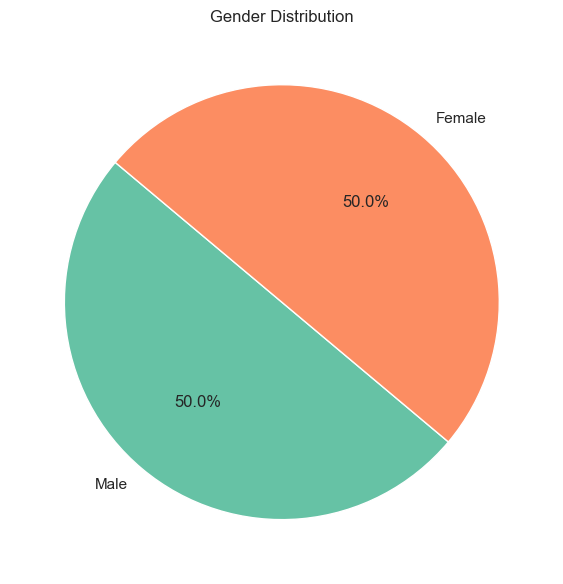

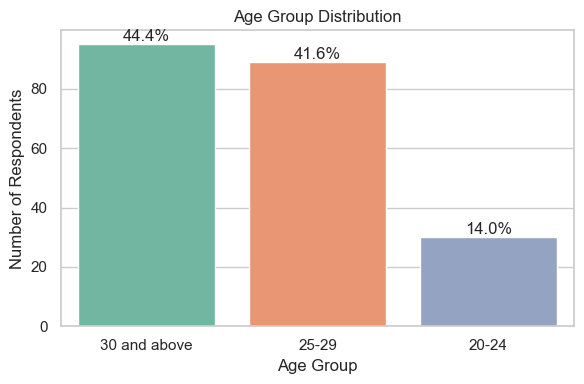

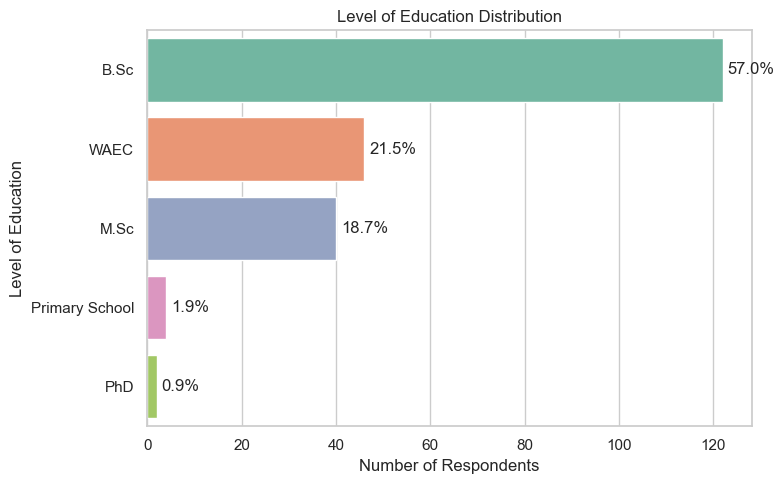

In [19]:
gender_counts = df['Sex'].value_counts()
colors = sns.color_palette('Set2')[:len(gender_counts)]

plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Gender Distribution')
plt.tight_layout()
plt.show()

age_counts = df['Age'].value_counts()
plt.figure(figsize=(6,4))
ax = sns.barplot(x=age_counts.index, y=age_counts.values, palette='Set2')
add_percentage_labels(ax, age_counts.sum())
plt.title('Age Group Distribution')
plt.ylabel('Number of Respondents')
plt.xlabel('Age Group')
plt.tight_layout()
plt.show()

inst_counts = df['Level of Education'].value_counts()
colors = sns.color_palette('Set2', len(inst_counts))

plt.figure(figsize=(8,5))
ax = sns.barplot(x=inst_counts.values, y=inst_counts.index, palette=colors)
total = inst_counts.sum()
for i, v in enumerate(inst_counts.values):
    percentage = 100 * v / total
    ax.text(v + 1, i, f'{percentage:.1f}%', va='center')
plt.title('Level of Education Distribution')
plt.xlabel('Number of Respondents')
plt.tight_layout()
plt.show()

## Business Characteristics of Respondents

This section describes the operational profiles of the SMEs surveyed:

---

### Years in Business
- **1–5 years:** 50.5%
- **6 years and above:** 49.5%

 **Insight:** The near-even split suggests a diverse sample of both relatively new and more established businesses, offering a balanced perspective on IoT adoption across different stages of business maturity.

---

### Number of Employees
- **1–10 employees:** 77.1%
- **31 and above:** 9.3%
- **11–20:** 8.4%
- **21–30:** 5.1%

 **Insight:** A large majority of respondents operate micro-enterprises (fewer than 10 employees), reflecting the typical structure of SMEs in Nigeria and highlighting potential challenges with scaling IoT solutions in very small teams.

---

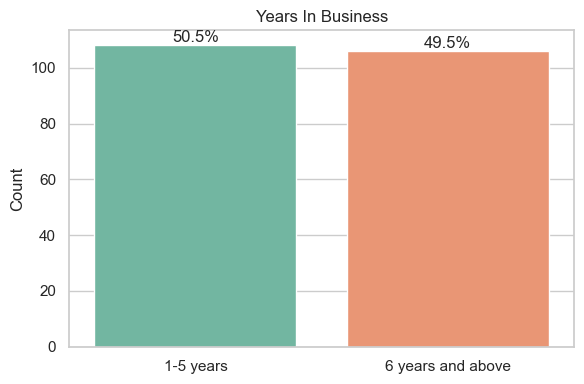

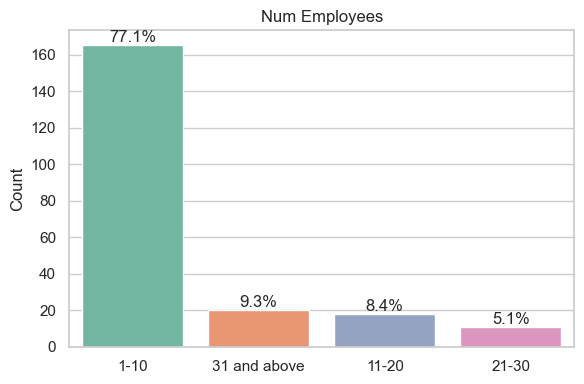

In [20]:
cols = ['Years_in_business','Num_employees']

for col in cols:
    counts = df[col].value_counts()
    total = counts.sum()
    
    # Bar plot
    plt.figure(figsize=(6,4))
    ax = sns.barplot(x=counts.index, y=counts.values, palette='Set2')
    add_percentage_labels(ax, total)
    plt.title(col.replace('_', ' ').title())
    plt.ylabel('Count')
    plt.xlabel('')
    plt.tight_layout()
    plt.show()

In [21]:
# grouping_vars = ['Age', 'Sex', 'Level of Education']

# for group in grouping_vars:
#     print(f"\n--- Grouped by {group} ---\n")

#     for col in cols:
#         plt.figure(figsize=(7,4))
#         ax = sns.countplot(data=df, x=col, hue=group, palette='Set2')
#         plt.title(f'{col.replace("_", " ").title()} by {group}')
#         plt.ylabel('Count')
#         plt.xlabel('')
#         plt.legend(title=group, bbox_to_anchor=(1.05, 1), loc='upper left')
#         plt.tight_layout()
#         plt.show()

## IoT Awareness & Knowledge

This section captures SME owners’ familiarity with IoT and their understanding of its basic concepts:

---

### Heard of IoT
- **Yes:** 78.0%
- **No:** 22.0%

 **Insight:** A strong majority have at least heard of IoT, indicating a good baseline awareness among SME owners in Osun State.

---

### IoT as Small & Intelligent Devices *(IoT_small_devices)*
- **Strongly Agree (SA):** 47.2%
- **Agree (A):** 29.9%
- **Indifferent (I):** 12.1%
- **Disagree (D):** 8.4%
- **Strongly Disagree (SD):** 2.3%

 **Insight:** Over 77% of respondents (SA + A) correctly recognize IoT as involving small, intelligent devices, showing strong conceptual understanding.

---

### IoT as a Network of Computers *(IoT_network_computers)*
- **SA:** 49.1%
- **A:** 27.6%
- **I:** 18.7%
- **SD:** 2.8%
- **D:** 1.9%

 **Insight:** Many respondents also associate IoT with computer networks, which is partially correct but could indicate some confusion between traditional IT networks and IoT systems.

---

### IoT as a Culmination of Digital Technologies *(IoT_digital_tech)*
- **SA:** 45.3%
- **A:** 34.6%
- **I:** 15.9%
- **SD:** 2.3%
- **D:** 1.9%

 **Insight:** A high agreement level suggests that most respondents appreciate IoT as an integration of multiple digital innovations, reflecting nuanced understanding.

---

### Examples of IoT Technologies *(IoT_examples)*
- **SA:** 46.3%
- **A:** 36.9%
- **I:** 14.5%
- **D:** 2.3%

 **Insight:** Nearly 83% agree with examples like smart watches or home security systems, demonstrating practical familiarity with real-world IoT applications.

---

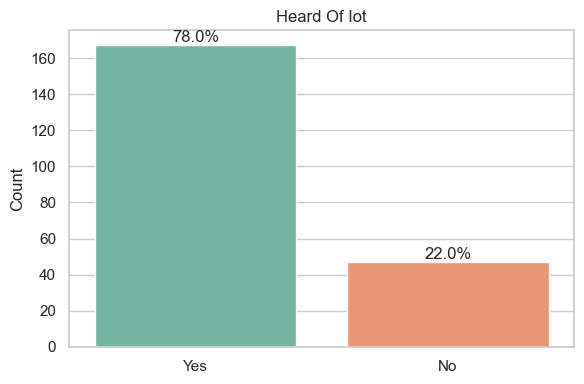

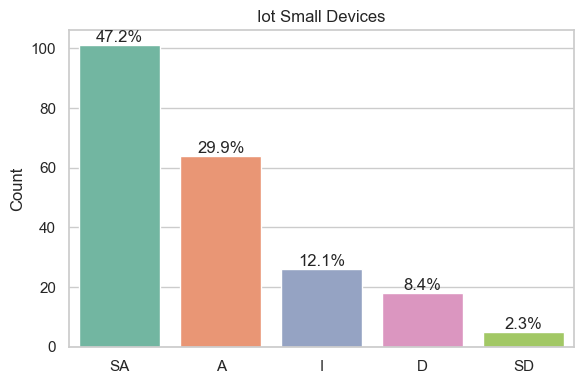

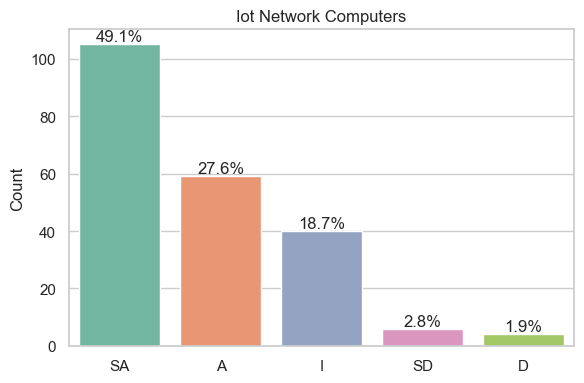

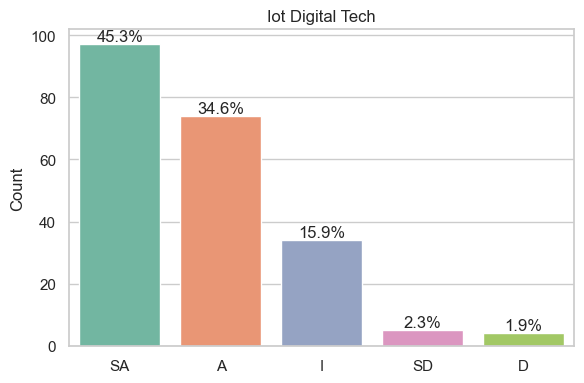

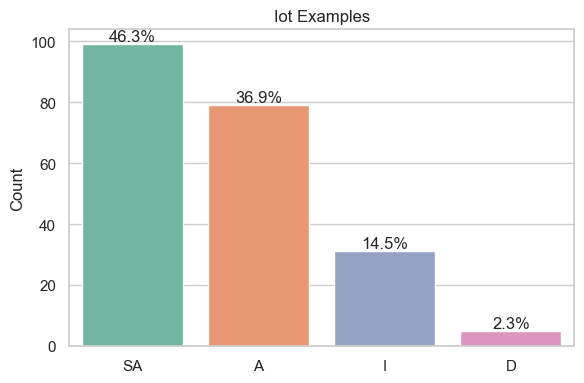

In [22]:
cols = ["Heard_of_IoT",
"IoT_small_devices",
"IoT_network_computers",
"IoT_digital_tech",
"IoT_examples"]

for col in cols:
    counts = df[col].value_counts()
    total = counts.sum()
    
    # Bar plot
    plt.figure(figsize=(6,4))
    ax = sns.barplot(x=counts.index, y=counts.values, palette='Set2')
    add_percentage_labels(ax, total)
    plt.title(col.replace('_', ' ').title())
    plt.ylabel('Count')
    plt.xlabel('')
    plt.tight_layout()
    plt.show()

## IoT Perceived Benefits

This section explores respondents’ views on how IoT can improve business operations:

---

### IoT Makes Jobs Faster *(IoT_jobs_faster)*
- **Strongly Agree (SA):** 48.6%
- **Agree (A):** 35.5%
- **Indifferent (I):** 11.7%
- **Disagree (D):** 4.2%

 **Insight:** Nearly 85% believe IoT speeds up tasks, highlighting expectations of faster workflows as a key motivation for adoption.

---

###  IoT Increases Efficiency *(IoT_efficiency)*
- **SA:** 50.0%
- **A:** 36.4%
- **I:** 10.3%
- **D:** 2.3%
- **SD:** 0.9%

 **Insight:** An overwhelming 86% agreement shows strong confidence in IoT’s ability to enhance productivity and streamline operations.

---

### IoT Applies to All Fields *(IoT_applies_all_fields)*
- **SA:** 46.7%
- **A:** 35.0%
- **I:** 15.0%
- **D:** 3.3%

 **Insight:** Over 81% believe IoT has universal applicability across sectors, suggesting broad perceived relevance among diverse SMEs.

---

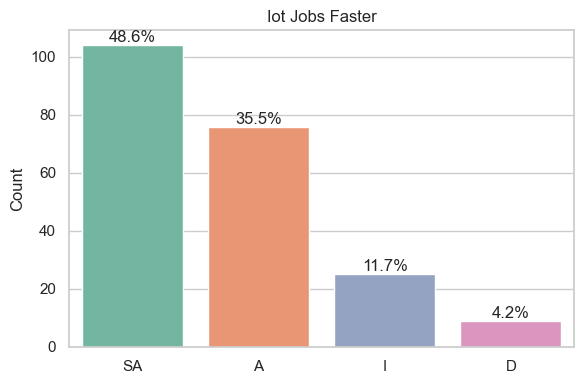

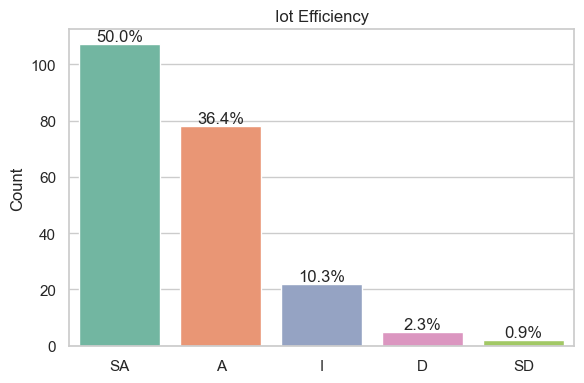

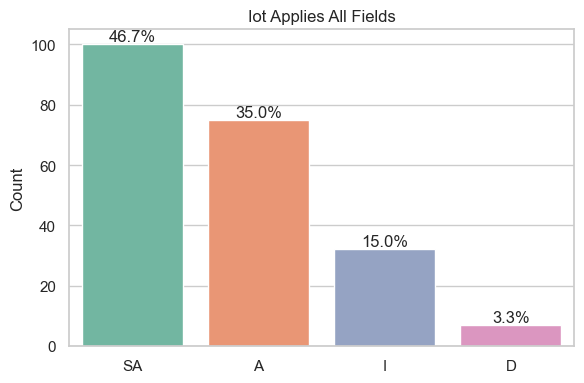

In [23]:
cols = ["IoT_jobs_faster",
"IoT_efficiency",
"IoT_applies_all_fields"]

for col in cols:
    counts = df[col].value_counts()
    total = counts.sum()
    
    # Bar plot
    
    plt.figure(figsize=(6,4))
    ax = sns.barplot(x=counts.index, y=counts.values, palette='Set2')
    add_percentage_labels(ax, total)
    plt.title(col.replace('_', ' ').title())
    plt.ylabel('Count')
    plt.xlabel('')
    plt.tight_layout()
    plt.show()

## IoT Adoption & Usage

This section details whether respondents actively use IoT and in what ways:

---

### Use of IoT *(Use_IoT)*
- **Yes:** 72.4%
- **No:** 27.6%

 **Insight:** A substantial majority of SMEs (over 70%) have already integrated IoT into their operations, indicating encouraging adoption rates in the region.

---

### How IoT is Used *(How_use_IoT)*
- **In-built system to track goods, production, and shelf life:** 32.7%
- **Automatic replies to customer enquiries:** 28.0%
- **Not using IoT:** 24.8%
- **Automatic recording of customer information:** 14.5%

 **Insight:** Inventory and production tracking is the most common IoT use case, followed by customer communication automation — but nearly 25% still report not using IoT despite claiming awareness, highlighting a gap between awareness and practical implementation.

---

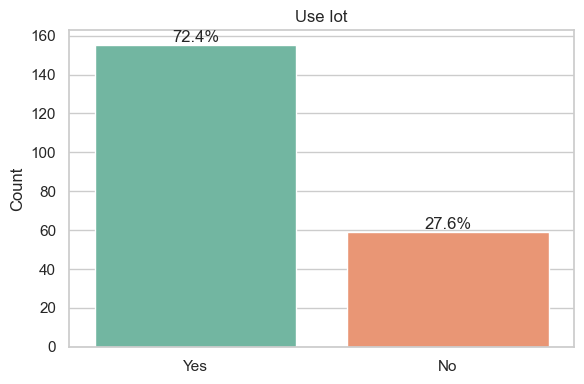

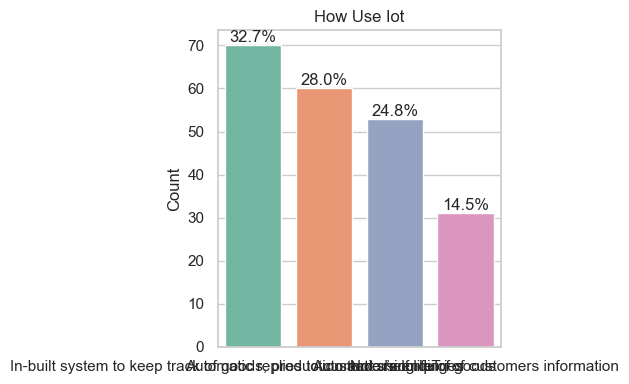

In [24]:
cols = ["Use_IoT",
"How_use_IoT"
]

for col in cols:
    counts = df[col].value_counts()
    total = counts.sum()
    
    # Bar plot
    plt.figure(figsize=(6,4))
    ax = sns.barplot(x=counts.index, y=counts.values, palette='Set2')
    add_percentage_labels(ax, total)
    plt.title(col.replace('_', ' ').title())
    plt.ylabel('Count')
    plt.xlabel('')
    plt.tight_layout()
    plt.show()

## Barriers to IoT Adoption

This section identifies the key challenges hindering IoT uptake among SMEs:

---

### Lack of Funds *(Lack_funds)*
- **Yes:** 59.3%
- **No:** 40.7%

 **Insight:** Limited financial resources are a major barrier, affecting over half of SMEs considering IoT adoption.

---

### Lack of Knowledge *(Lack_knowledge)*
- **Yes:** 65.9%
- **No:** 34.1%

 **Insight:** Inadequate understanding of IoT technologies is the most widely reported obstacle, highlighting an urgent need for education and awareness programs.

---

### IoT Too Complex *(IoT_too_complex)*
- **Yes:** 56.1%
- **No:** 43.9%

 **Insight:** Many respondents perceive IoT as overly complicated, suggesting the need for simplified solutions and better communication of IoT’s ease of use.

---

### Equipment Costly *(Equipment_costly)*
- **Yes:** 57.5%
- **No:** 42.5%

 **Insight:** High equipment costs deter more than half of respondents, underscoring the importance of affordable IoT solutions for SMEs.

---

### No Maintenance Personnel *(No_maintenance)*
- **Yes:** 52.8%
- **No:** 47.2%

 **Insight:** Lack of qualified maintenance support is a significant concern, which could lead to hesitancy in adopting complex systems.

---

### Lack of Skills *(Lack_skills)*
- **Yes:** 51.4%
- **No:** 48.6%

 **Insight:** A shortage of skilled personnel to manage and implement IoT technologies is another critical barrier to widespread adoption.

---

### Not Enough Staff *(Not_enough_staff)*
- **Yes:** 53.3%
- **No:** 46.7%

 **Insight:** Limited workforce size constrains many SMEs from dedicating personnel to deploy or maintain IoT systems effectively.

---

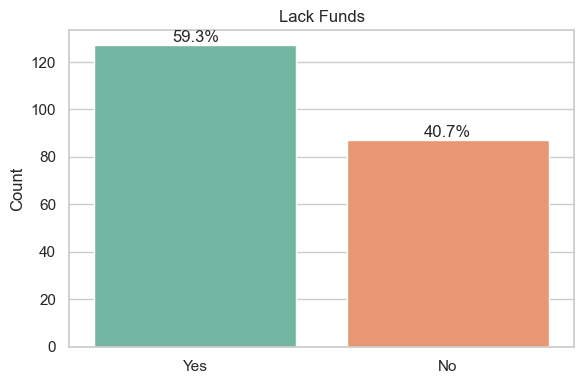

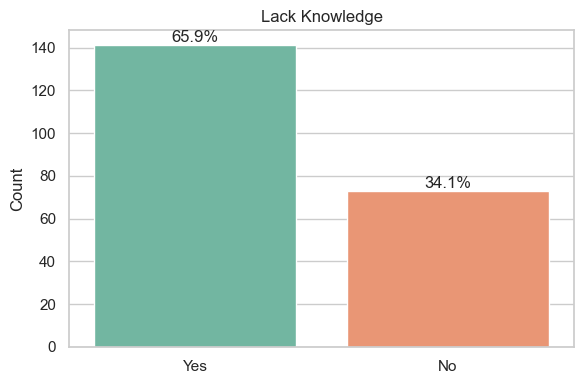

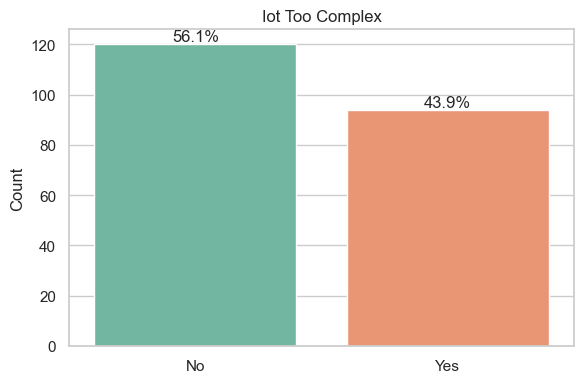

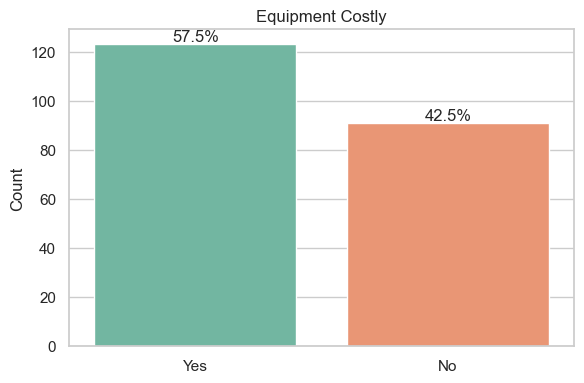

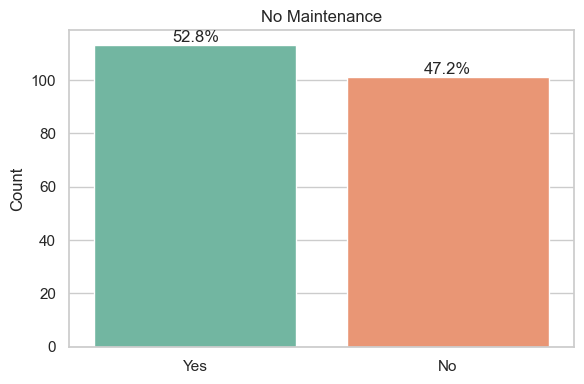

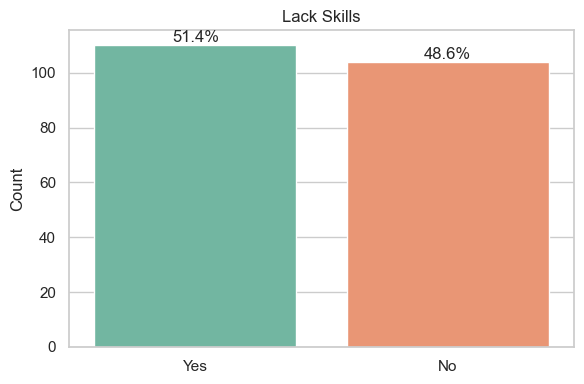

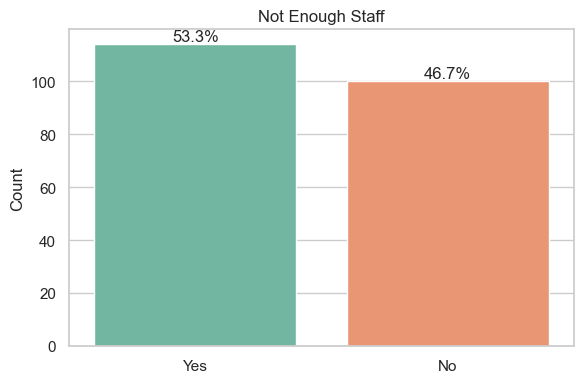

In [25]:
cols = ["Lack_funds",
"Lack_knowledge",
"IoT_too_complex",
"Equipment_costly",
"No_maintenance",
"Lack_skills",
"Not_enough_staff"]

for col in cols:
    counts = df[col].value_counts()
    total = counts.sum()
    
    # Bar plot
    plt.figure(figsize=(6,4))
    ax = sns.barplot(x=counts.index, y=counts.values, palette='Set2')
    add_percentage_labels(ax, total)
    plt.title(col.replace('_', ' ').title())
    plt.ylabel('Count')
    plt.xlabel('')
    plt.tight_layout()
    plt.show()

## Financial Performance

This section explores respondents’ revenue levels over different time frames, offering insights into the financial state of SMEs and potential links with IoT adoption.

---

### Income Over the Past 5 Years *(Income_5years)*
- **Above 500,000:** 54.7%
- **50,000 to 100,000:** 20.6%
- **100,000 to 500,000:** 18.7%
- **Below 50,000:** 6.1%

 **Insight:** More than half of respondents reported earnings above 500,000 NGN in the past five years, suggesting that a significant portion of SMEs are performing relatively well, possibly reflecting stability or growth potential.

---

### Income Over the Past 6 Months *(Income_6months)*
- **Above 500,000:** 42.5%
- **50,000 to 100,000:** 22.0%
- **Below 50,000:** 19.6%
- **100,000 to 500,000:** 15.9%

 **Insight:** Income distribution in the last six months shows a drop in the proportion earning above 500,000 NGN compared to the five-year period, which may indicate recent economic challenges or seasonal variations affecting SME revenues.

---

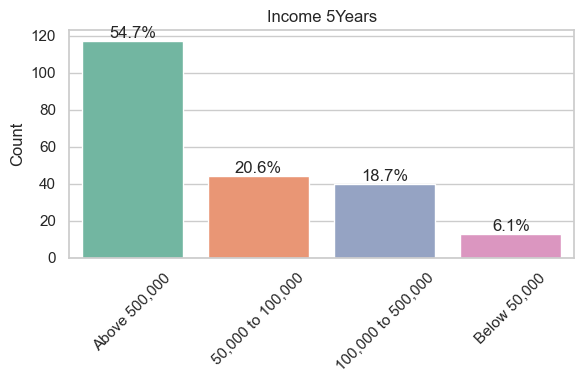

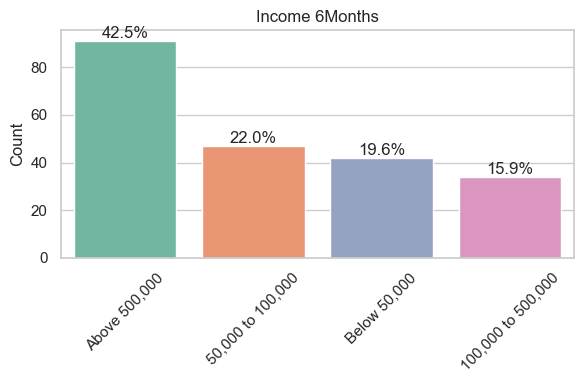

In [26]:
cols = ["Income_5years",
"Income_6months"]

for col in cols:
    counts = df[col].value_counts()
    total = counts.sum()
    
    # Bar plot
    plt.figure(figsize=(6,4))
    ax = sns.barplot(x=counts.index, y=counts.values, palette='Set2')
    add_percentage_labels(ax, total)
    plt.title(col.replace('_', ' ').title())
    plt.ylabel('Count')
    plt.xlabel('')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Business Outcomes from IoT Adoption

This section highlights the perceived effects of IoT integration on business growth, profitability, customer loyalty, and loss reduction among SMEs.

---

### Impact on Business Growth *(IoT_impact_growth)*
- **Yes:** 69.2%
- **No:** 30.8%

 **Insight:** Nearly 70% of SMEs reported that IoT adoption has positively impacted their business growth, emphasizing its transformative potential.

---

### Increase in Profit *(IoT_increase_profit)*
- **Yes:** 71.0%
- **No:** 29.0%

 **Insight:** A substantial majority experienced increased profits post-IoT implementation, highlighting IoT’s role in enhancing revenue streams.

---

### Customer Retention *(IoT_customer_retention)*
- **Yes:** 71.0%
- **No:** 29.0%

 **Insight:** Maintaining customers is a key business goal, and 71% of respondents confirmed better customer retention since adopting IoT technologies.

---

### Reduction in Loss *(IoT_reduce_loss)*
- **Yes:** 68.2%
- **No:** 31.8%

 **Insight:** About two-thirds noted a reduction in losses, underscoring IoT’s effectiveness in improving operational control and minimizing waste or inefficiencies.

---

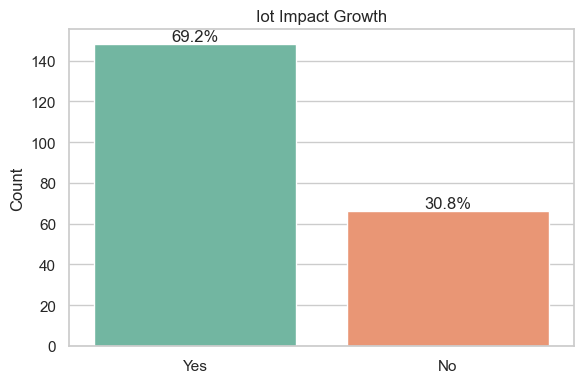

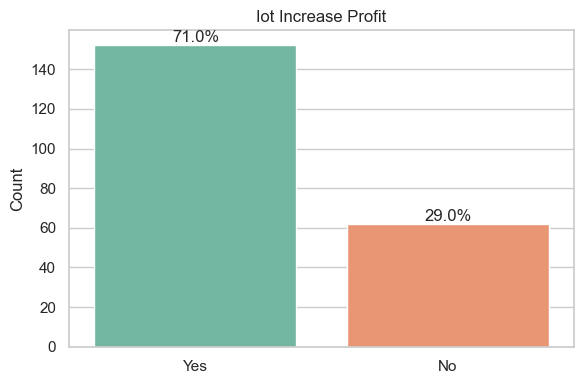

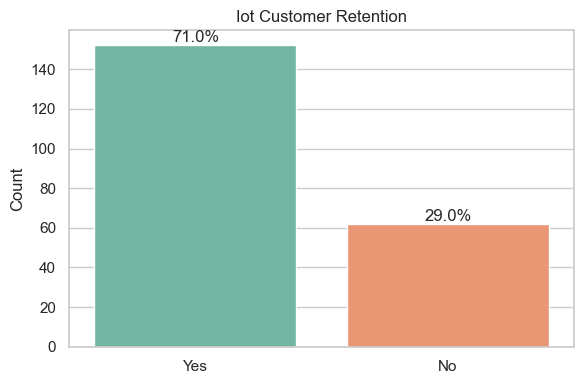

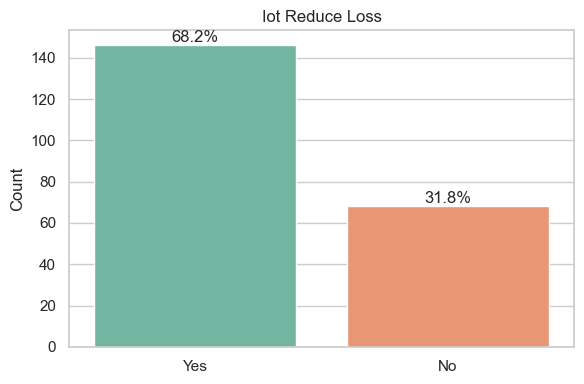

In [27]:
cols = ["IoT_impact_growth",
"IoT_increase_profit",
"IoT_customer_retention",
"IoT_reduce_loss"]

for col in cols:
    counts = df[col].value_counts()
    total = counts.sum()
    
    # Bar plot
    plt.figure(figsize=(6,4))
    ax = sns.barplot(x=counts.index, y=counts.values, palette='Set2')
    add_percentage_labels(ax, total)
    plt.title(col.replace('_', ' ').title())
    plt.ylabel('Count')
    plt.xlabel('')
    plt.tight_layout()
    plt.show()

## Summary of Descriptive Statistics

The descriptive statistics offer a comprehensive overview of the SME landscape and IoT adoption in Osun State, revealing important patterns:

- **Balanced Demographics:** Respondents were evenly split by gender, mostly aged 25–30+, and predominantly held B.Sc degrees — indicating a young, educated entrepreneurial population.
  
- **Business Characteristics:** Half of SMEs have been operating for over 5 years, yet most employ fewer than 10 people, underscoring their small-scale nature despite longevity.
  
- **IoT Awareness & Knowledge:** Over 78% had heard of IoT, and most respondents demonstrated strong agreement with statements defining IoT’s concepts — suggesting high awareness and understanding among SMEs.
  
- **Perceived Benefits:** The majority believe IoT makes jobs faster (84% agreeing) and improves efficiency (86% agreeing), with many recognizing its applicability across industries.
  
- **Adoption & Usage:** About 72% of businesses already use IoT, applying it mainly for tracking goods, automating responses, and customer data recording.
  
- **Barriers:** Key challenges to IoT adoption included lack of knowledge (66%), insufficient funds (59%), perceived complexity, and equipment costs — highlighting areas needing support for broader IoT integration.
  
- **Financial Performance:** While more than half reported earning above 500,000 NGN in the past five years, fewer achieved similar levels in the last six months, hinting at recent financial strain.
  
- **Business Outcomes:** Among IoT adopters, over 68%–71% experienced growth, increased profit, improved customer retention, and reduced losses — demonstrating IoT’s positive impact on SME performance.

These insights establish a clear snapshot of SMEs’ demographics, IoT engagement, and the potential gains and challenges, setting a strong baseline for deeper analysis of the study’s objectives.

In [28]:
df.columns

Index(['Age', 'Sex', 'Level of Education', 'Years_in_business',
       'Num_employees', 'Heard_of_IoT', 'IoT_small_devices',
       'IoT_network_computers', 'IoT_digital_tech', 'IoT_examples',
       'IoT_jobs_faster', 'IoT_efficiency', 'IoT_applies_all_fields',
       'Use_IoT', 'How_use_IoT', 'Lack_funds', 'Lack_knowledge',
       'IoT_too_complex', 'Equipment_costly', 'No_maintenance', 'Lack_skills',
       'Not_enough_staff', 'Income_5years', 'Income_6months',
       'IoT_impact_growth', 'IoT_increase_profit', 'IoT_customer_retention',
       'IoT_reduce_loss'],
      dtype='object')

## Objective 1: Level of Awareness & Knowledge

### Awareness of IoT

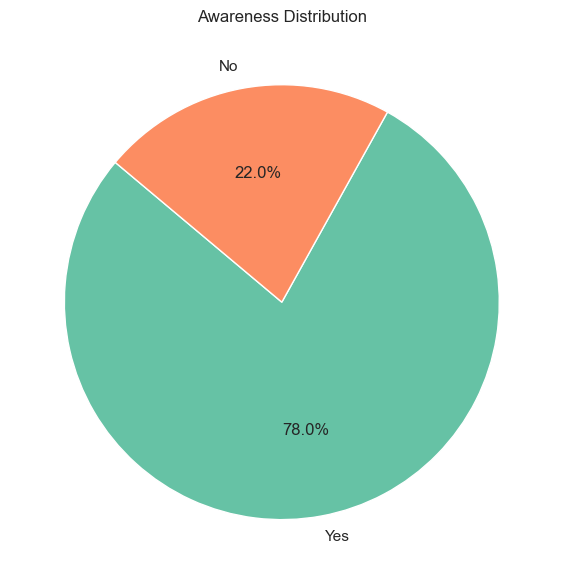

In [57]:
aware_counts = df['Heard_of_IoT'].value_counts()
colors = sns.color_palette('Set2')[:len(aware_counts)]

plt.figure(figsize=(6,6))
plt.pie(aware_counts, labels=aware_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Awareness Distribution')
plt.tight_layout()
plt.show()

### Knowledge about IoT

Mean scores:
 IoT_small_devices        4.112150
IoT_network_computers    4.182243
IoT_digital_tech         4.186916
IoT_examples             4.271028
dtype: float64

Iot Small Devices
SA: 47.2%
A: 29.9%
I: 12.1%
D: 8.4%
SD: 2.3%


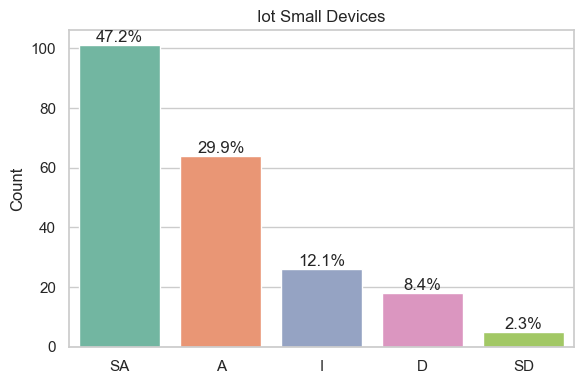


Iot Network Computers
SA: 49.1%
A: 27.6%
I: 18.7%
SD: 2.8%
D: 1.9%


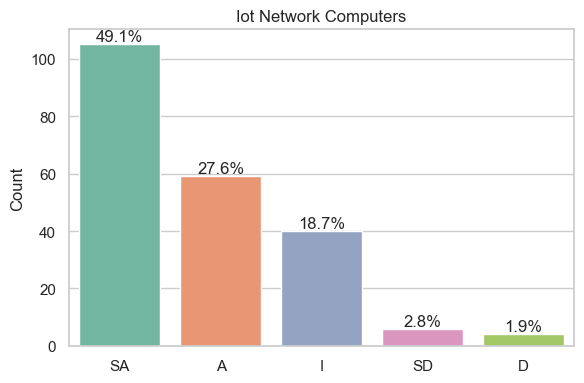


Iot Digital Tech
SA: 45.3%
A: 34.6%
I: 15.9%
SD: 2.3%
D: 1.9%


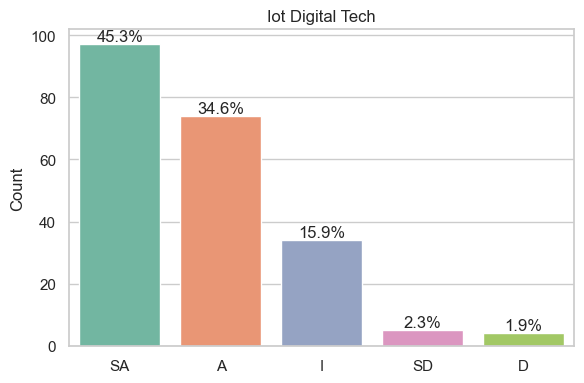


Iot Examples
SA: 46.3%
A: 36.9%
I: 14.5%
D: 2.3%


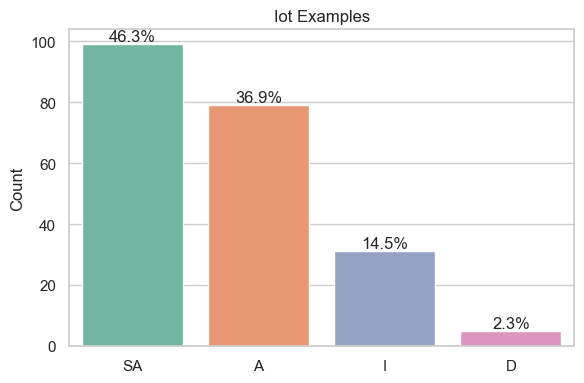

In [ ]:
likert_map = {
    "SA": 5,
    "A": 4,
    "I": 3,
    "D": 2,
    "SD": 1
}

knowledge_columns = ['IoT_small_devices', 'IoT_network_computers', 'IoT_digital_tech', 'IoT_examples']

df_numeric = df[knowledge_columns].replace(likert_map)

mean_scores = df_numeric.mean()
# median_scores = df_numeric.median()

print("Mean scores:\n", mean_scores)
# print("Median scores:\n", median_scores)

for col in knowledge_columns:
    counts = df[col].value_counts()
    total = counts.sum()

    percentages = (counts / total * 100).round(1)
    
    # Display table of percentages
    print(f"\n{col.replace('_', ' ').title()}")
    for response, pct in percentages.items():
        print(f"{response}: {pct}%")

    # Bar plot
    plt.figure(figsize=(6,4))
    ax = sns.barplot(x=counts.index, y=counts.values, palette='Set2')
    add_percentage_labels(ax, total)
    plt.title(col.replace('_', ' ').title())
    plt.ylabel('Count')
    plt.xlabel('')
    plt.tight_layout()
    plt.show()

### Awareness by Demographic Factors


Chi-Square Test between 'Heard_of_IoT' and 'Sex':
Chi2 = 0.44, df = 1, p-value = 0.5089
→ No significant association (p ≥ 0.05)


IoT awareness by Sex  - Percentage (%):
 Sex           Female   Male
Heard_of_IoT               
No             55.32  44.68
Yes            48.50  51.50


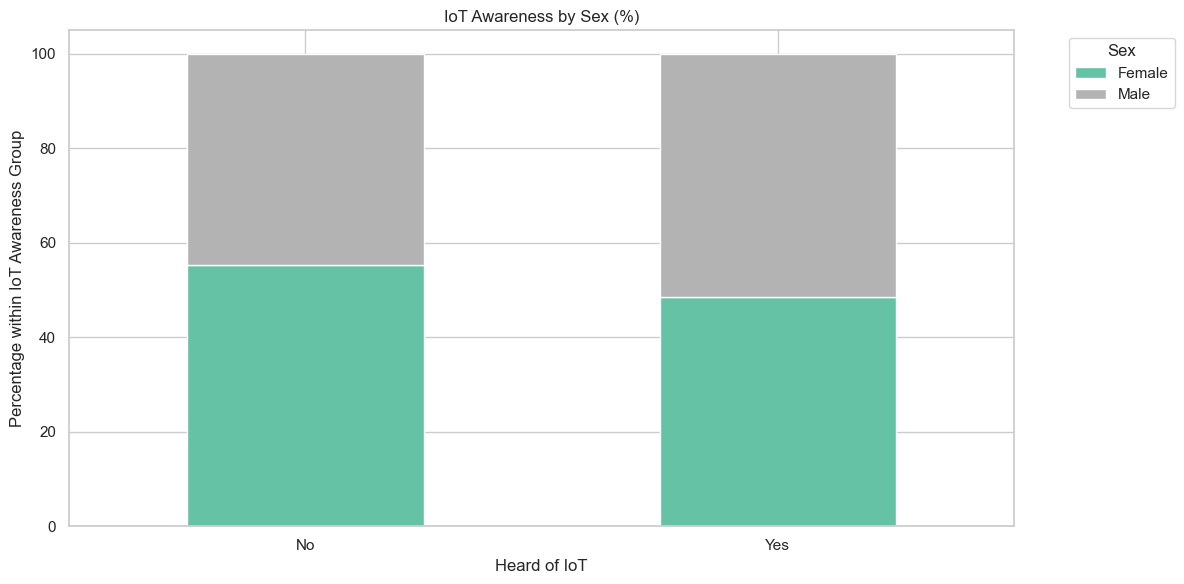


Chi-Square Test between 'Heard_of_IoT' and 'Age':
Chi2 = 3.85, df = 2, p-value = 0.1455
→ No significant association (p ≥ 0.05)


IoT awareness by Age  - Percentage (%):
 Age           20-24  25-29  30 and above
Heard_of_IoT                            
No            21.28  44.68         34.04
Yes           11.98  40.72         47.31


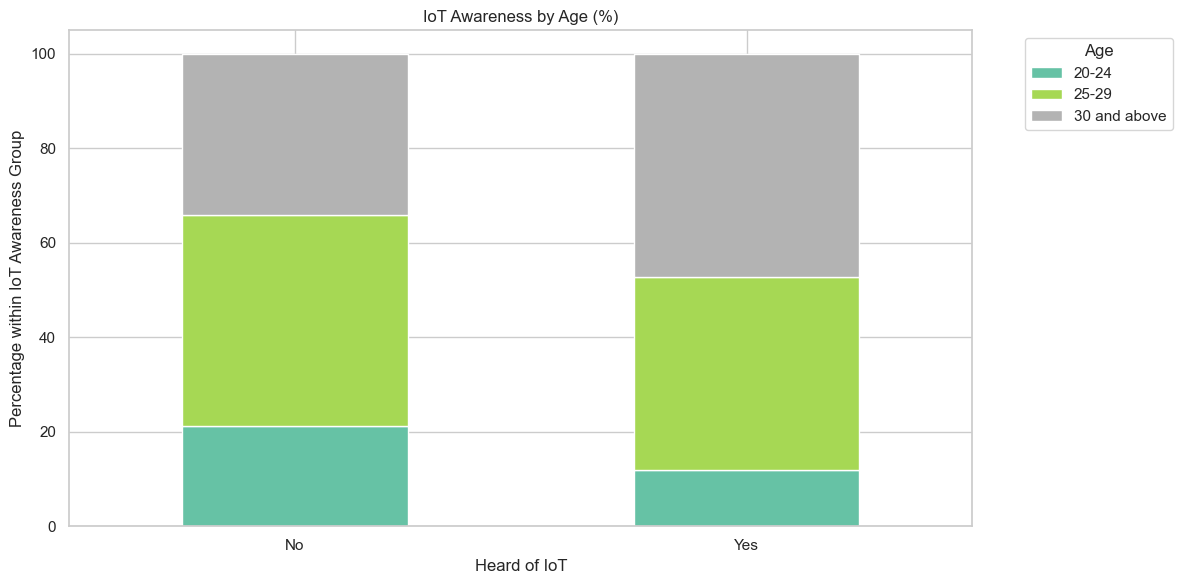


Chi-Square Test between 'Heard_of_IoT' and 'Level of Education':
Chi2 = 70.98, df = 4, p-value = 0.0000
→ Significant association found (p < 0.05)


IoT awareness by Level of Education  - Percentage (%):
 Level of Education   B.Sc   M.Sc  PhD  Primary School   WAEC
Heard_of_IoT                                                
No                  21.28  10.64  0.0            8.51  59.57
Yes                 67.07  20.96  1.2            0.00  10.78


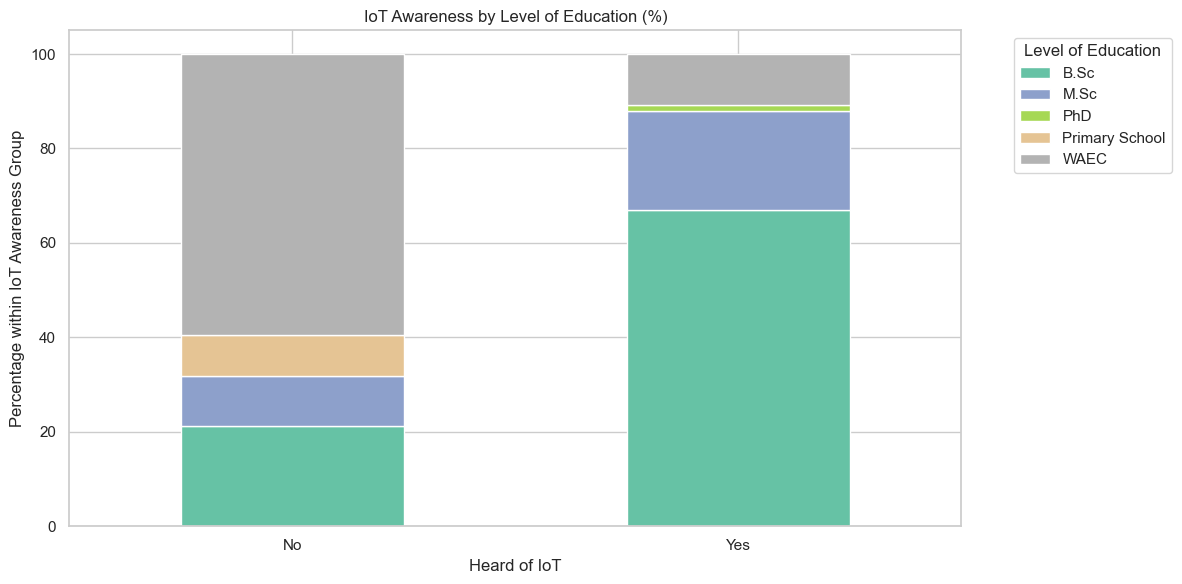

In [54]:
cols = ['Sex', 'Age', 'Level of Education']

for col in cols:
    # Raw count crosstab (not normalized)
    ct = pd.crosstab(df['Heard_of_IoT'], df[col])

    # Perform chi-squared test
    chi2, p, dof, expected = chi2_contingency(ct)

    print(f"\nChi-Square Test between 'Heard_of_IoT' and '{col}':")
    print(f"Chi2 = {chi2:.2f}, df = {dof}, p-value = {p:.4f}")

    if p < 0.05:
        print("→ Significant association found (p < 0.05)")
    else:
        print("→ No significant association (p ≥ 0.05)")

    # Normalized table for percentage plot
    ct_norm = ct.div(ct.sum(axis=1), axis=0) * 100
    print("\n\nIoT awareness by", col, " - Percentage (%):\n", ct_norm.round(2))
    
    # Plot stacked bar chart
    ct_norm.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
    plt.title(f'IoT Awareness by {col} (%)')
    plt.ylabel('Percentage within IoT Awareness Group')
    plt.xlabel('Heard of IoT')
    plt.xticks(rotation=0)
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

## Objective 1: Level of Awareness & Knowledge of IoT

### Awareness of IoT

- **78.0%** of respondents have **heard of IoT**, indicating a high general awareness.
- **22.0%** remain unaware, which shows there's still room for education and outreach.

### Knowledge of IoT (Likert Scale Analysis)

Mean knowledge scores (on a scale of 1 to 5):

| IoT Knowledge Item             | Mean Score |
|-------------------------------|------------|
| IoT Examples                  | 4.27       |
| IoT Digital Technologies      | 4.19       |
| IoT as a Network of Computers | 4.18       |
| IoT as Small Devices Network  | 4.11       |

- Most respondents **agree** or **strongly agree** with accurate descriptions of IoT.
- The **highest agreement** is with examples of IoT (e.g., smartwatches, cameras), suggesting familiarity with practical applications.

### Knowledge Distribution (% of responses):

#### IoT as Small Devices
- SA: 47.2%, A: 29.9%, I: 12.1%, D: 8.4%, SD: 2.3%

#### IoT as Network of Computers
- SA: 49.1%, A: 27.6%, I: 18.7%, SD: 2.8%, D: 1.9%

#### IoT as Digital Technology
- SA: 45.3%, A: 34.6%, I: 15.9%, SD: 2.3%, D: 1.9%

#### IoT Examples (e.g., smartwatches, cameras)
- SA: 46.3%, A: 36.9%, I: 14.5%, D: 2.3%

> **Insight**: Respondents show **strong understanding** of IoT concepts, especially practical applications and digital nature.

---

### Awareness by Demographic Factors

#### Sex
- **No significant association** between gender and IoT awareness (p = 0.5089).
- Awareness was nearly balanced between males and females.

#### Age
- **No significant association** found with age group (p = 0.1455).
- However, those **30 and above** showed slightly higher awareness (47.3%).

#### Education Level
- **Significant association** found (p < 0.001).
- Higher levels of education correlate with increased awareness:
  - **67.1% of aware respondents hold a B.Sc**
  - Only **10.8% of aware respondents have WAEC** as their highest qualification.

> **Insight**: **Education level is a key predictor** of IoT awareness — targeted educational interventions could help improve awareness among less-educated groups.

---

 **Conclusion**: IoT awareness among respondents is high overall. Respondents demonstrate a good grasp of core IoT concepts, especially practical applications. Education level plays a critical role in shaping this awareness, suggesting a potential path for policy or outreach initiatives.

## Objective 2: Extent of Adoption & Application of IoT

### Overall IoT Adoption Rate

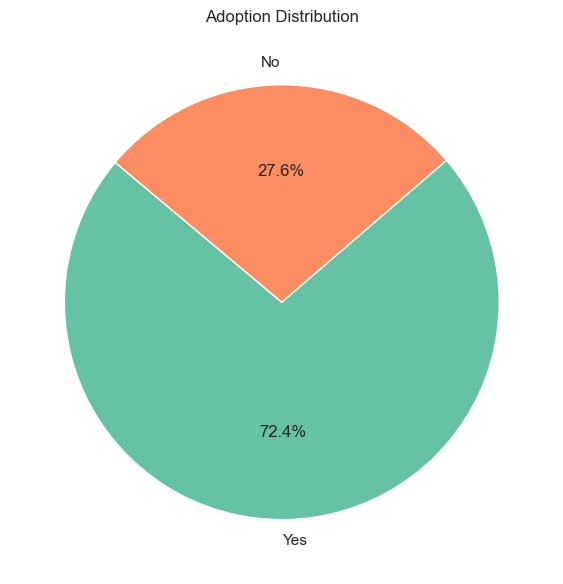

In [70]:
use_counts = df['Use_IoT'].value_counts()
colors = sns.color_palette('Set2')[:len(use_counts)]

plt.figure(figsize=(6,6))
plt.pie(use_counts, labels=use_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Adoption Distribution')
plt.tight_layout()
plt.show()

### How Business Use IoT

In [59]:
df['How_use_IoT'].value_counts()

How_use_IoT
In-built system to keep track of goods, production and shelf life of goods    70
Automatic replies to customer’s enquiries                                     60
Not using IoT                                                                 53
Automatic recording of customers information                                  31
Name: count, dtype: int64


How Use Iot
In-built system to keep track of goods, production and shelf life of goods: 32.7%
Automatic replies to customer’s enquiries: 28.0%
Not using IoT: 24.8%
Automatic recording of customers information: 14.5%


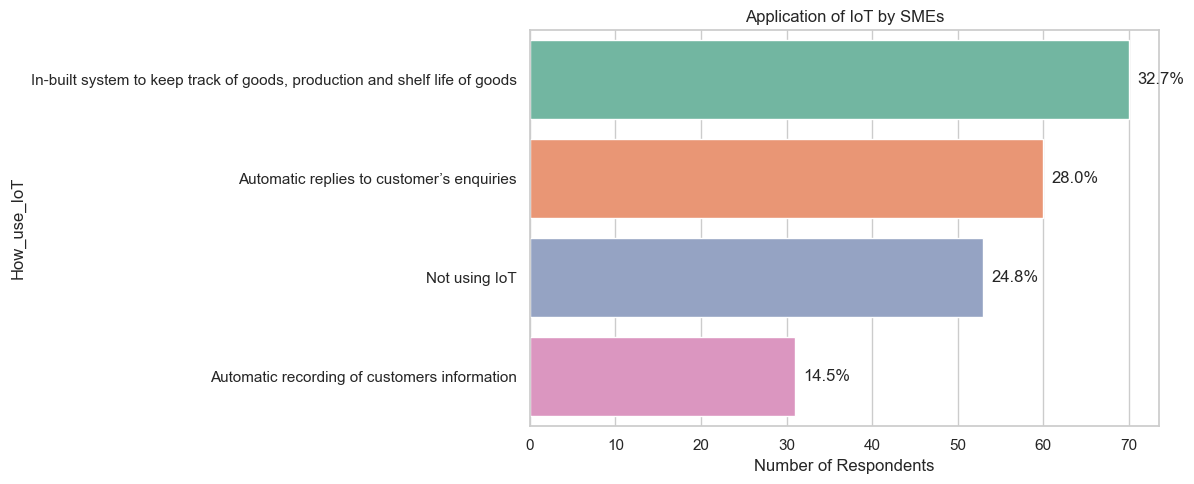

In [71]:
col = 'How_use_IoT'
how_counts = df['How_use_IoT'].value_counts()
colors = sns.color_palette('Set2', len(how_counts))

total = how_counts.sum()
    
percentages = (how_counts / total * 100).round(1)
    
# Display table of percentages
print(f"\n{col.replace('_', ' ').title()}")
for response, pct in percentages.items():
    print(f"{response}: {pct}%")


plt.figure(figsize=(12,5))
ax = sns.barplot(x=how_counts.values, y=how_counts.index, palette=colors)
total = how_counts.sum()
for i, v in enumerate(how_counts.values):
    percentage = 100 * v / total
    ax.text(v + 1, i, f'{percentage:.1f}%', va='center')
plt.title('Application of IoT by SMEs')
plt.xlabel('Number of Respondents')
plt.tight_layout()
plt.show()

### Adoption vs. Years in Business


Chi-Square Test between 'Use_IoT' and 'Years_in_business':
Chi2 = 0.69, df = 1, p-value = 0.4045
→ No significant association (p ≥ 0.05)


IoT Adoption by Years in Business - Percentage (%):
 Use_IoT               No    Yes
Years_in_business              
1-5 years          30.56  69.44
6 years and above  24.53  75.47


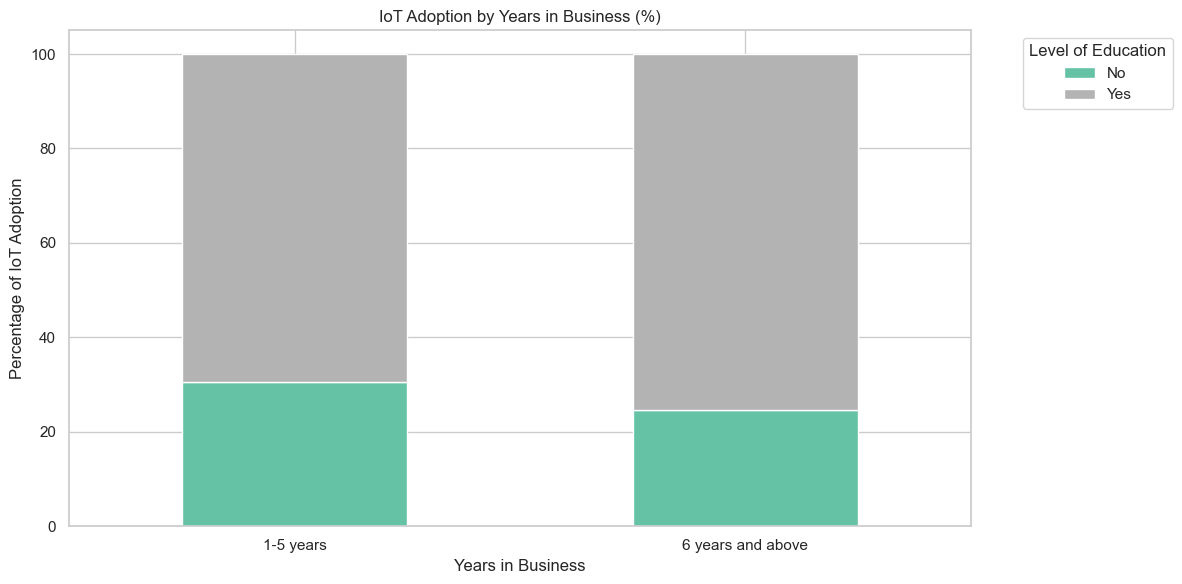

In [ ]:
# Raw count crosstab (not normalized)
ct = pd.crosstab(df['Years_in_business'], df['Use_IoT'])

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(ct)

print(f"\nChi-Square Test between 'Use_IoT' and 'Years_in_business':")
print(f"Chi2 = {chi2:.2f}, df = {dof}, p-value = {p:.4f}")

if p < 0.05:
    print("→ Significant association found (p < 0.05)")
else:
    print("→ No significant association (p ≥ 0.05)")

# Normalized table for percentage plot
ct_norm = ct.div(ct.sum(axis=1), axis=0) * 100
print("\n\nIoT Adoption by Years in Business - Percentage (%):\n", ct_norm.round(2))

# Plot stacked bar chart
ct_norm.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
plt.title(f'IoT Adoption by Years in Business (%)')
plt.ylabel('Percentage of IoT Adoption')
plt.xlabel('Years in Business')
plt.xticks(rotation=0)
plt.legend(title='Use_IoT', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### ADoption vs. Number of Employees


Chi-Square Test between 'Use_IoT' and 'Num_employees':
Chi2 = 9.61, df = 3, p-value = 0.0222
→ Significant association found (p < 0.05)


IoT Adoption by Number of Employees - Percentage (%):
 Use_IoT           No    Yes
Num_employees              
1-10           32.73  67.27
11-20          11.11  88.89
21-30           9.09  90.91
31 and above   10.00  90.00


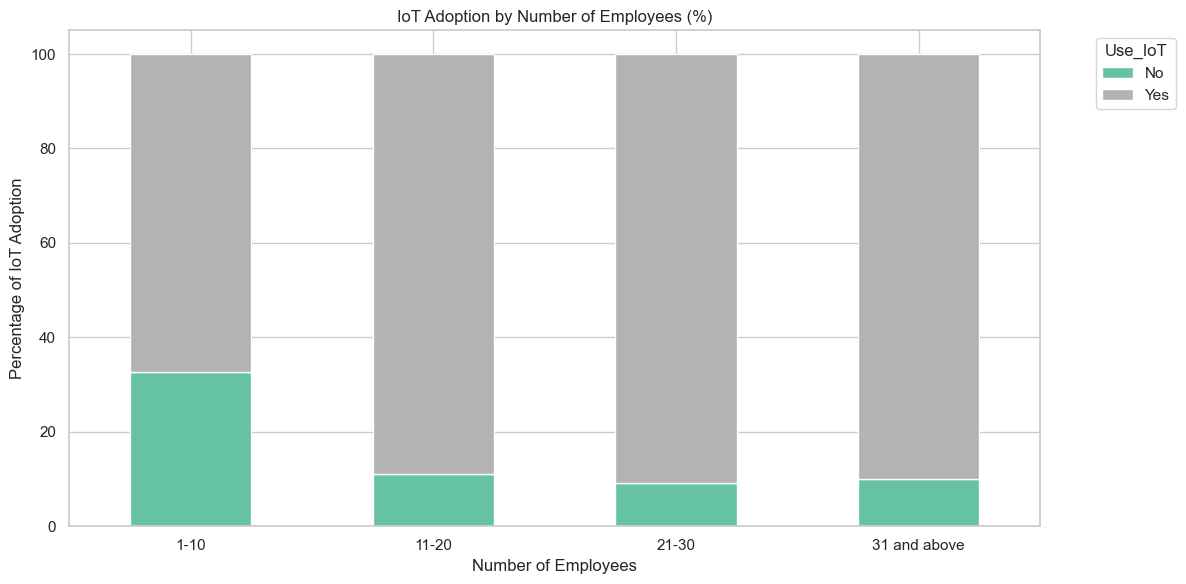

In [67]:
# Raw count crosstab (not normalized)
ct = pd.crosstab(df['Num_employees'], df['Use_IoT'])

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(ct)

print(f"\nChi-Square Test between 'Use_IoT' and 'Num_employees':")
print(f"Chi2 = {chi2:.2f}, df = {dof}, p-value = {p:.4f}")

if p < 0.05:
    print("→ Significant association found (p < 0.05)")
else:
    print("→ No significant association (p ≥ 0.05)")

# Normalized table for percentage plot
ct_norm = ct.div(ct.sum(axis=1), axis=0) * 100
print("\n\nIoT Adoption by Number of Employees - Percentage (%):\n", ct_norm.round(2))

# Plot stacked bar chart
ct_norm.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
plt.title(f'IoT Adoption by Number of Employees (%)')
plt.ylabel('Percentage of IoT Adoption')
plt.xlabel('Number of Employees')
plt.xticks(rotation=0)
plt.legend(title='Use_IoT', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Awareness vs Adoption of IoT


Chi-Square Test between 'Use_IoT' and 'Heard_of_IoT':
Chi2 = 96.19, df = 1, p-value = 0.0000
→ Significant association found (p < 0.05)


IoT Adoption by Awareness - Percentage (%):
 Use_IoT          No    Yes
Heard_of_IoT              
No            85.11  14.89
Yes           11.38  88.62


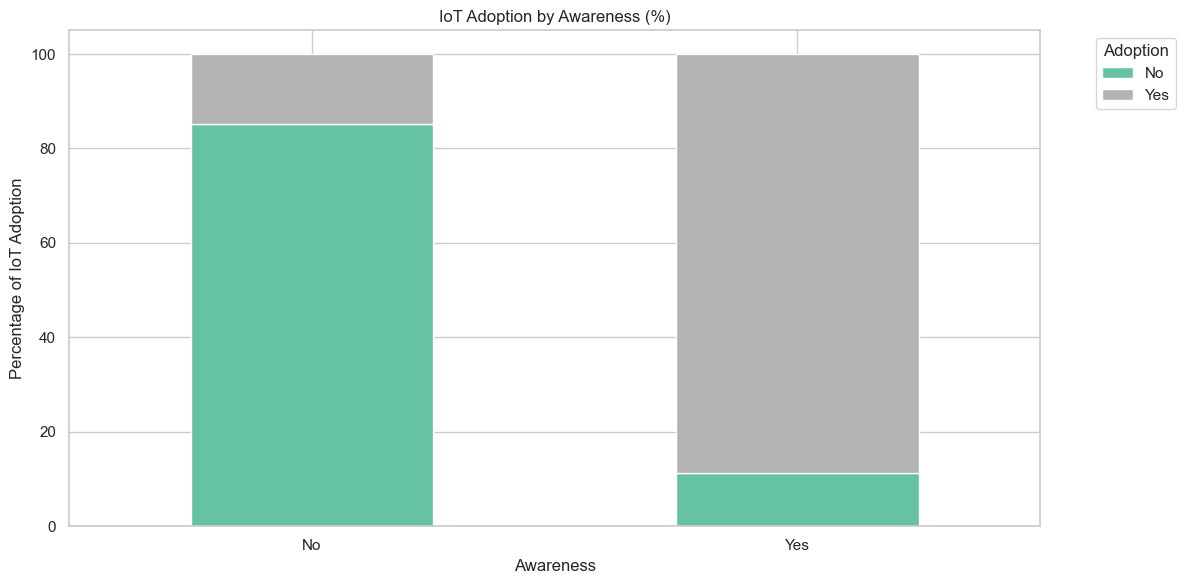

In [69]:
# Raw count crosstab (not normalized)
ct = pd.crosstab(df['Heard_of_IoT'], df['Use_IoT'])

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(ct)

print(f"\nChi-Square Test between 'Use_IoT' and 'Heard_of_IoT':")
print(f"Chi2 = {chi2:.2f}, df = {dof}, p-value = {p:.4f}")

if p < 0.05:
    print("→ Significant association found (p < 0.05)")
else:
    print("→ No significant association (p ≥ 0.05)")

# Normalized table for percentage plot
ct_norm = ct.div(ct.sum(axis=1), axis=0) * 100
print("\n\nIoT Adoption by Awareness - Percentage (%):\n", ct_norm.round(2))

# Plot stacked bar chart
ct_norm.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
plt.title(f'IoT Adoption by Awareness (%)')
plt.ylabel('Percentage of IoT Adoption')
plt.xlabel('Awareness')
plt.xticks(rotation=0)
plt.legend(title='Adoption', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Objective 2: Extent of Adoption & Application of IoT

### Overall IoT Adoption Rate

- **72.4%** of SME respondents reported **using IoT** in their business operations.
- **27.6%** have **not adopted** IoT.

> **Insight:** A clear majority of SMEs have embraced IoT, indicating strong penetration among Osun State SMEs.

---

### How SMEs Use IoT

| IoT Application                                                                 | % of Users |
|----------------------------------------------------------------------------------|------------|
| In-built systems for tracking goods, production, shelf life                     | 32.7%      |
| Automatic replies to customer enquiries                                         | 28.0%      |
| **Not using IoT**                                                               | 24.8%      |
| Automatic customer information recording                                       | 14.5%      |

> **Insight:** Inventory and customer service automation are the **top two applications**, highlighting practical, efficiency-driven uses of IoT.

---

### IoT Adoption by Business Age

**Chi-Square Test:**
- χ² = 0.69, p = 0.4045 → Not significant

| Years in Business | % Using IoT | % Not Using IoT |
|-------------------|-------------|------------------|
| 1–5 years         | 69.4%       | 30.6%            |
| 6+ years          | 75.5%       | 24.5%            |

> **Insight:** While more experienced businesses show **slightly higher adoption**, the difference is **not statistically significant**.

---

### IoT Adoption by Number of Employees

**Chi-Square Test:**
- χ² = 9.61, p = 0.0222 → **Significant**

| Employees       | % Using IoT | % Not Using IoT |
|------------------|-------------|------------------|
| 1–10             | 67.3%       | 32.7%            |
| 11–20            | 88.9%       | 11.1%            |
| 21–30            | 90.9%       | 9.1%             |
| 31+              | 90.0%       | 10.0%            |

> **Insight:** Larger businesses are **significantly more likely** to adopt IoT — suggesting that **scale and operational complexity** drive IoT integration.

---

### Awareness vs Adoption

**Chi-Square Test:**
- χ² = 96.19, p < 0.001 → **Highly Significant**

| Awareness       | % Using IoT | % Not Using IoT |
|------------------|-------------|------------------|
| Heard of IoT     | 88.6%       | 11.4%            |
| Never Heard of IoT | 14.9%       | 85.1%            |

> **Insight:** Awareness is a **strong predictor** of adoption. SMEs that are aware of IoT are **7× more likely** to use it.

---

### Conclusion

Most SMEs surveyed have adopted IoT, primarily for inventory and customer communication automation. While years in business didn’t significantly affect adoption, **business size and IoT awareness** had a **strong positive relationship** with usage. This indicates that both **scaling operations** and **educational exposure** are key drivers of IoT implementation in small and medium enterprises.

## Objective 3: Education vs IoT Awareness and Adoption 

### Awareness vs. Level of Education


Chi-Square Test between 'Heard_of_IoT' and 'Level of Education':
Chi2 = 70.98, df = 4, p-value = 0.0000
→ Significant association found (p < 0.05)


IoT awareness by Level of Education  - Percentage (%):
 Heard_of_IoT            No     Yes
Level of Education                
B.Sc                  8.20   91.80
M.Sc                 12.50   87.50
PhD                   0.00  100.00
Primary School      100.00    0.00
WAEC                 60.87   39.13


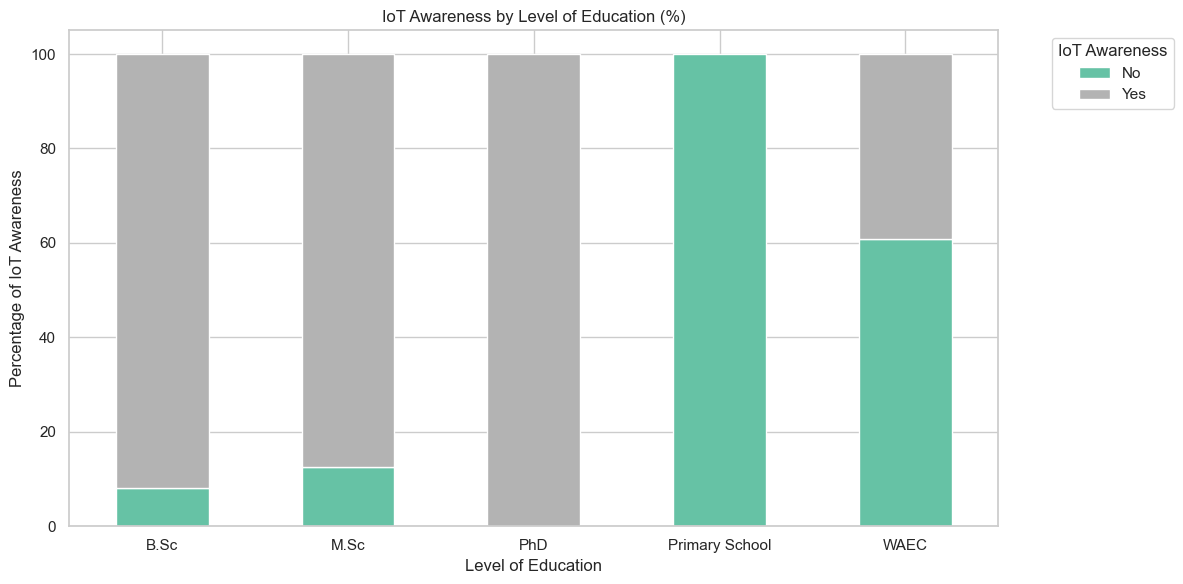

In [76]:
col = 'Level of Education'
# Raw count crosstab (not normalized)
ct = pd.crosstab(df[col], df['Heard_of_IoT'])

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(ct)

print(f"\nChi-Square Test between 'Heard_of_IoT' and '{col}':")
print(f"Chi2 = {chi2:.2f}, df = {dof}, p-value = {p:.4f}")

if p < 0.05:
    print("→ Significant association found (p < 0.05)")
else:
    print("→ No significant association (p ≥ 0.05)")

# Normalized table for percentage plot
ct_norm = ct.div(ct.sum(axis=1), axis=0) * 100
print("\n\nIoT awareness by", col, " - Percentage (%):\n", ct_norm.round(2))

# Plot stacked bar chart
ct_norm.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
plt.title(f'IoT Awareness by {col} (%)')
plt.ylabel('Percentage of IoT Awareness')
plt.xlabel('Level of Education')
plt.xticks(rotation=0)
plt.legend(title="IoT Awareness", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Adoption vs. Level of Education


Chi-Square Test between 'Use_IoT' and 'Level of Education':
Chi2 = 63.56, df = 4, p-value = 0.0000
→ Significant association found (p < 0.05)


IoT adoption by Level of Education  - Percentage (%):
 Use_IoT                 No     Yes
Level of Education                
B.Sc                 18.03   81.97
M.Sc                  5.00   95.00
PhD                   0.00  100.00
Primary School      100.00    0.00
WAEC                 67.39   32.61


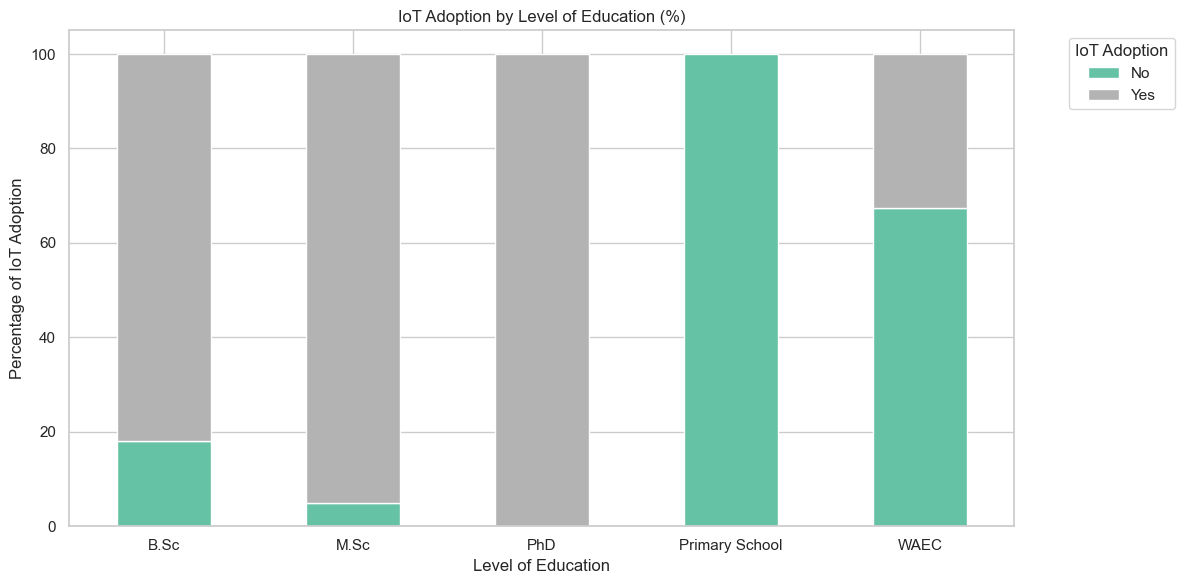

In [75]:
col = 'Level of Education'
# Raw count crosstab (not normalized)
ct = pd.crosstab(df[col], df['Use_IoT'])

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(ct)

print(f"\nChi-Square Test between 'Use_IoT' and '{col}':")
print(f"Chi2 = {chi2:.2f}, df = {dof}, p-value = {p:.4f}")

if p < 0.05:
    print("→ Significant association found (p < 0.05)")
else:
    print("→ No significant association (p ≥ 0.05)")

# Normalized table for percentage plot
ct_norm = ct.div(ct.sum(axis=1), axis=0) * 100
print("\n\nIoT adoption by", col, " - Percentage (%):\n", ct_norm.round(2))

# Plot stacked bar chart
ct_norm.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
plt.title(f'IoT Adoption by {col} (%)')
plt.ylabel('Percentage of IoT Adoption')
plt.xlabel('Level of Education')
plt.xticks(rotation=0)
plt.legend(title="IoT Adoption", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Objective 3: Education vs IoT Awareness and Adoption

### Awareness of IoT by Education Level

**Chi-Square Test:**
- χ² = 70.98, df = 4, **p < 0.001** → **Statistically significant**

| Level of Education | % Aware of IoT | % Not Aware |
|--------------------|----------------|-------------|
| B.Sc               | 91.8%          | 8.2%        |
| M.Sc               | 87.5%          | 12.5%       |
| PhD                | 100.0%         | 0.0%        |
| WAEC               | 39.1%          | 60.9%       |
| Primary School     | 0.0%           | 100.0%      |

>  **Insight:** Awareness of IoT is **strongly tied to educational attainment.** Respondents with B.Sc, M.Sc, or PhD show **near-universal awareness**, while those with WAEC or less are mostly unaware.

---

### Adoption of IoT by Education Level

**Chi-Square Test:**
- χ² = 63.56, df = 4, **p < 0.001** → **Statistically significant**

| Level of Education | % Adopted IoT | % Not Using IoT |
|--------------------|----------------|------------------|
| B.Sc               | 82.0%          | 18.0%            |
| M.Sc               | 95.0%          | 5.0%             |
| PhD                | 100.0%         | 0.0%             |
| WAEC               | 32.6%          | 67.4%            |
| Primary School     | 0.0%           | 100.0%           |

>  **Insight:** IoT adoption **dramatically increases** with higher education. While 95%+ of those with postgraduate degrees adopt IoT, **none** of those with only Primary education do.

---

### Conclusion

Both **awareness and adoption** of IoT among SMEs in Osun State are **strongly and significantly influenced by education level**. The higher the educational qualification, the more likely a business owner is to:
- Know what IoT is
- Actively use it in business operations

This suggests that **capacity building and digital education initiatives** could be crucial for improving IoT uptake among less-educated SME operators.

## Objective 4: Impact of IoT on Business Growth & Development

### Income of IoT Users vs Non-Users


Chi-Square Test between 'Use_IoT' and 'Income_5years':
Chi2 = 39.22, df = 3, p-value = 0.0000
→ Significant association found (p < 0.05)


IoT adoption by Income_5years  - Percentage (%):
 Income_5years  100,000 to 500,000  50,000 to 100,000  Above 500,000  \
Use_IoT                                                               
No                          32.20              40.68          23.73   
Yes                         13.55              12.90          66.45   

Income_5years  Below 50,000  
Use_IoT                      
No                     3.39  
Yes                    7.10  


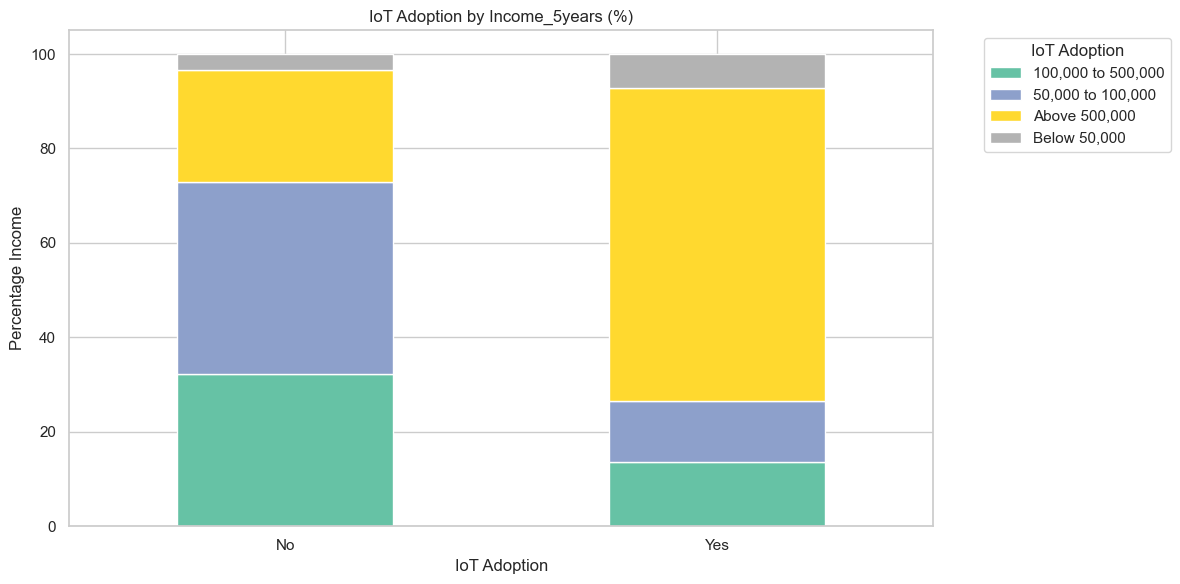

In [84]:
col = 'Income_5years'
# Raw count crosstab (not normalized)
ct = pd.crosstab(df['Use_IoT'], df[col])

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(ct)

print(f"\nChi-Square Test between 'Use_IoT' and '{col}':")
print(f"Chi2 = {chi2:.2f}, df = {dof}, p-value = {p:.4f}")

if p < 0.05:
    print("→ Significant association found (p < 0.05)")
else:
    print("→ No significant association (p ≥ 0.05)")

# Normalized table for percentage plot
ct_norm = ct.div(ct.sum(axis=1), axis=0) * 100
print("\n\nIoT adoption by", col, " - Percentage (%):\n", ct_norm.round(2))

# Plot stacked bar chart
ct_norm.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
plt.title(f'IoT Adoption by {col} (%)')
plt.ylabel('Percentage Income')
plt.xlabel('IoT Adoption')
plt.xticks(rotation=0)
plt.legend(title="IoT Adoption", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Business Growth Indicators


Chi-Square Test between 'Use_IoT' and 'IoT_impact_growth':
Chi2 = 136.74, df = 1, p-value = 0.0000
→ Significant association found (p < 0.05)


IoT Adoption by IoT_impact_growth  - Percentage (%):
 IoT_impact_growth     No    Yes
Use_IoT                        
No                 91.53   8.47
Yes                 7.74  92.26


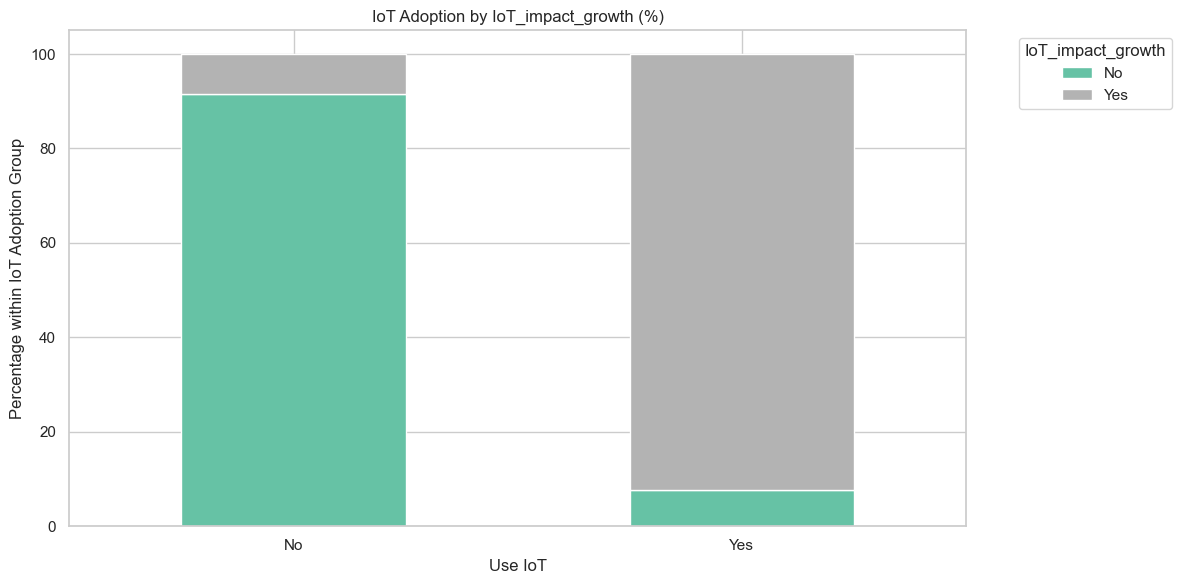


Chi-Square Test between 'Use_IoT' and 'IoT_customer_retention':
Chi2 = 119.42, df = 1, p-value = 0.0000
→ Significant association found (p < 0.05)


IoT Adoption by IoT_customer_retention  - Percentage (%):
 IoT_customer_retention     No    Yes
Use_IoT                             
No                      84.75  15.25
Yes                      7.74  92.26


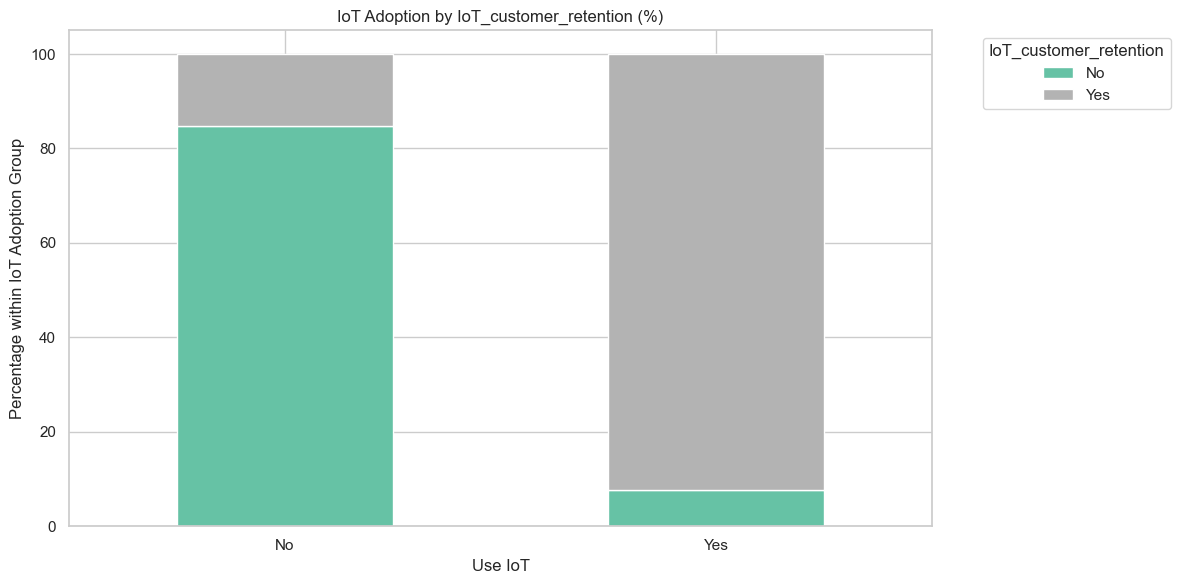


Chi-Square Test between 'Use_IoT' and 'IoT_reduce_loss':
Chi2 = 77.25, df = 1, p-value = 0.0000
→ Significant association found (p < 0.05)


IoT Adoption by IoT_reduce_loss  - Percentage (%):
 IoT_reduce_loss     No    Yes
Use_IoT                      
No               77.97  22.03
Yes              14.19  85.81


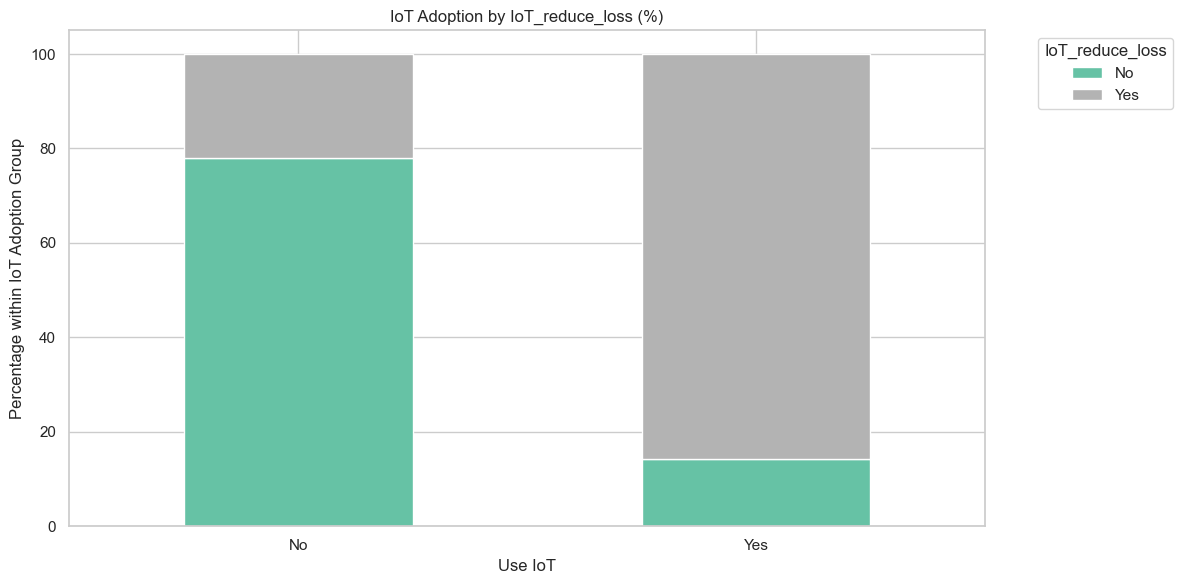

In [85]:
cols = ['IoT_impact_growth', 'IoT_customer_retention', 'IoT_reduce_loss']

for col in cols:
    # Raw count crosstab (not normalized)
    ct = pd.crosstab(df['Use_IoT'], df[col])

    # Perform chi-squared test
    chi2, p, dof, expected = chi2_contingency(ct)

    print(f"\nChi-Square Test between 'Use_IoT' and '{col}':")
    print(f"Chi2 = {chi2:.2f}, df = {dof}, p-value = {p:.4f}")

    if p < 0.05:
        print("→ Significant association found (p < 0.05)")
    else:
        print("→ No significant association (p ≥ 0.05)")

    # Normalized table for percentage plot
    ct_norm = ct.div(ct.sum(axis=1), axis=0) * 100
    print("\n\nIoT Adoption by", col, " - Percentage (%):\n", ct_norm.round(2))
    
    # Plot stacked bar chart
    ct_norm.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
    plt.title(f'IoT Adoption by {col} (%)')
    plt.ylabel('Percentage within IoT Adoption Group')
    plt.xlabel('Use IoT')
    plt.xticks(rotation=0)
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

### Income vs Growth Perception (Within IoT Users)


Chi-Square Test between 'Use_IoT' and 'IoT_reduce_loss':
Chi2 = 23.40, df = 3, p-value = 0.0000
→ Significant association found (p < 0.05)


Income Distribution by Perceieved IoT Impact:
 Income_5years      100,000 to 500,000  50,000 to 100,000  Above 500,000  \
IoT_impact_growth                                                         
No                              33.33              50.00          16.67   
Yes                             11.89               9.79          70.63   

Income_5years      Below 50,000  
IoT_impact_growth                
No                         0.00  
Yes                        7.69  


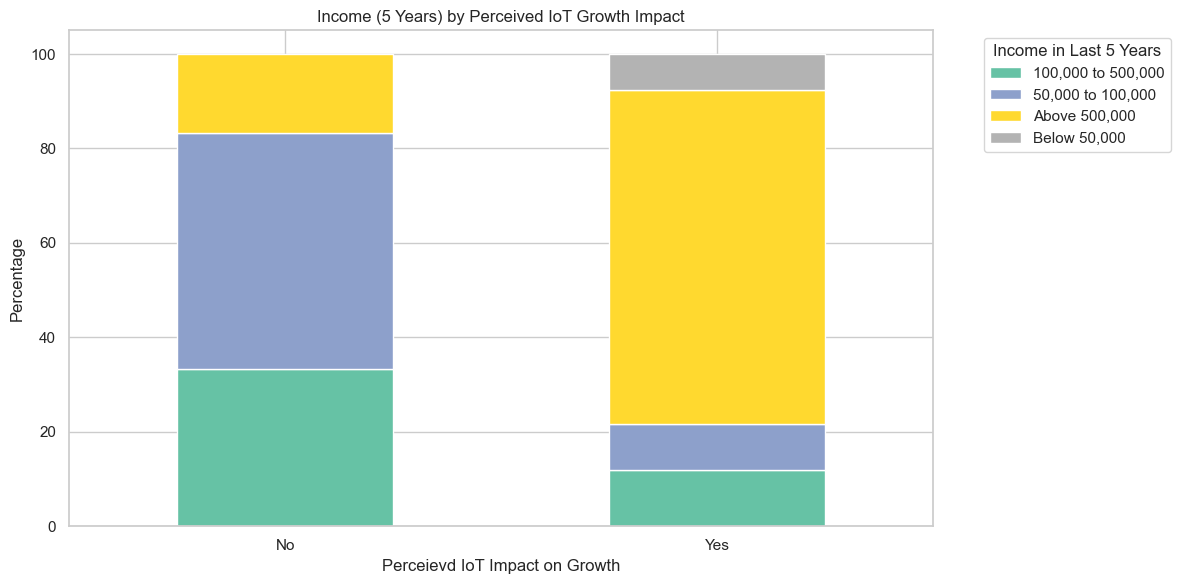

In [86]:
iot_users = df[df['Use_IoT'] == 'Yes']

# Raw count crosstab (not normalized)
ct = pd.crosstab(iot_users['IoT_impact_growth'], iot_users['Income_5years'])

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(ct)

print(f"\nChi-Square Test between 'Use_IoT' and '{col}':")
print(f"Chi2 = {chi2:.2f}, df = {dof}, p-value = {p:.4f}")

if p < 0.05:
    print("→ Significant association found (p < 0.05)")
else:
    print("→ No significant association (p ≥ 0.05)")

# Normalized table for percentage plot
ct_norm = ct.div(ct.sum(axis=1), axis=0) * 100
print("\n\nIncome Distribution by Perceieved IoT Impact:\n", ct_norm.round(2))

# Plot stacked bar chart
ct_norm.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
plt.title('Income (5 Years) by Perceived IoT Growth Impact')
plt.ylabel('Percentage')
plt.xlabel('Perceievd IoT Impact on Growth')
plt.xticks(rotation=0)
plt.legend(title='Income in Last 5 Years', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Objective 4: Impact of IoT on SMEs Business Growth & Development

### Income of IoT Users vs Non-Users

A **Chi-Square test** shows a **significant association** between IoT adoption and income levels:

- **Chi2 = 39.22**, **df = 3**, **p-value = 0.0000**
-  **IoT adopters are more likely to fall into higher income brackets**

**Income Distribution (%) by IoT Usage:**

| Income Level         | Non-Users | IoT Users |
|----------------------|-----------|-----------|
| Above 500,000        | 23.7%     | 66.5%     |
| 100,000 to 500,000   | 32.2%     | 13.6%     |
| 50,000 to 100,000    | 40.7%     | 12.9%     |
| Below 50,000         | 3.4%      | 7.1%      |

>  **Insight:** IoT users significantly outperform non-users in income, especially in the “Above 500,000” category.

---

### Business Growth Indicators

Chi-Square tests confirm **strong associations** between IoT usage and key growth outcomes:

#### A. Reported Business Growth
- **Chi2 = 136.74**, **p = 0.0000**
- 92.3% of IoT users reported business growth vs only 8.5% of non-users.

#### B. Customer Retention
- **Chi2 = 119.42**, **p = 0.0000**
- 92.3% of IoT users retained customers vs 15.3% of non-users.

#### C. Loss Reduction
- **Chi2 = 77.25**, **p = 0.0000**
- 85.8% of IoT users cut down on loss vs 22.0% of non-users.

> **Insight:** Businesses that use IoT report significantly better growth, retention, and loss control.

---

### Income vs Perceived IoT Impact (Among IoT Users)

Among only IoT users, those who **perceived positive impact** from IoT reported **higher income levels**:

| Income Level         | No Impact | Positive Impact |
|----------------------|-----------|-----------------|
| Above 500,000        | 16.7%     | 70.6%           |
| 100,000 to 500,000   | 33.3%     | 11.9%           |
| 50,000 to 100,000    | 50.0%     | 9.8%            |
| Below 50,000         | 0.0%      | 7.7%            |

- **Chi2 = 23.40**, **df = 3**, **p = 0.0000**

> **Insight:** SMEs that report positive impact from IoT are also the ones with higher income, reinforcing its growth potential.

---

### Conclusion:
There is strong statistical evidence that IoT adoption **correlates with higher income**, **enhanced business growth**, **better customer retention**, and **reduced losses**. These findings validate the transformative potential of IoT for SMEs in Osun State.

## Objective 5: Probability & Efficiency Outcomes

### Descriptive Summary of Efficiency & Probability Outcomes


Iot Increase Profit
Yes: 71.0%
No: 29.0%


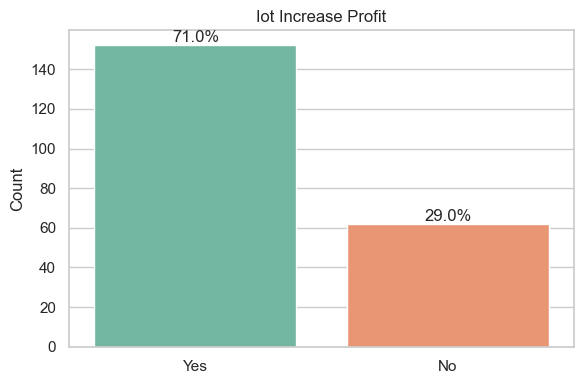


Iot Customer Retention
Yes: 71.0%
No: 29.0%


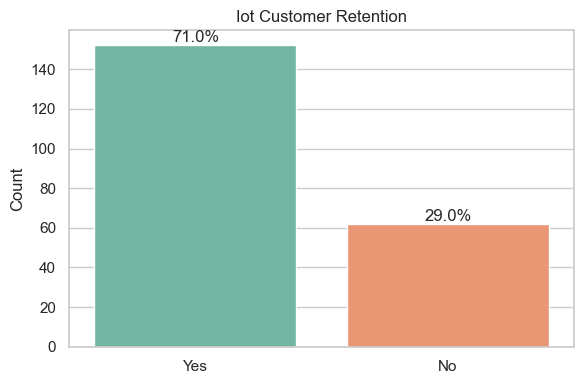


Iot Reduce Loss
Yes: 68.2%
No: 31.8%


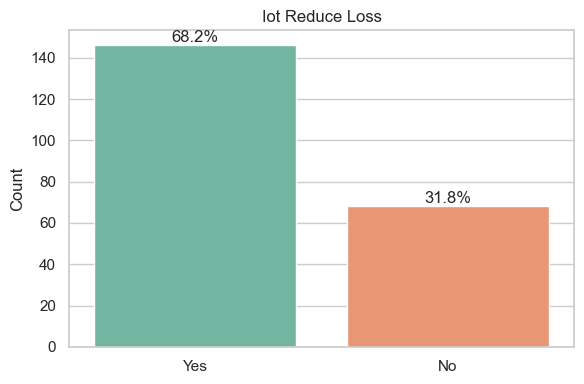

In [90]:
cols = ['IoT_increase_profit', 'IoT_customer_retention', 'IoT_reduce_loss']

for col in cols:
    counts = df[col].value_counts()
    total = counts.sum()

    percentages = (counts / total * 100).round(1)
    
    # Display table of percentages
    print(f"\n{col.replace('_', ' ').title()}")
    for response, pct in percentages.items():
        print(f"{response}: {pct}%")
        
    # Bar plot
    plt.figure(figsize=(6,4))
    ax = sns.barplot(x=counts.index, y=counts.values, palette='Set2')
    add_percentage_labels(ax, total)
    plt.title(col.replace('_', ' ').title())
    plt.ylabel('Count')
    plt.xlabel('')
    plt.tight_layout()
    plt.show()

### Association Between IoT Usage and Each Outcomes


Chi-Square Test between 'Use_IoT' and 'IoT_increase_profit':
Chi2 = 126.91, df = 1, p-value = 0.0000
→ Significant association found (p < 0.05)


IoT Adoption by IoT_increase_profit  - Percentage (%):
 IoT_increase_profit     No    Yes
Use_IoT                          
No                   86.44  13.56
Yes                   7.10  92.90


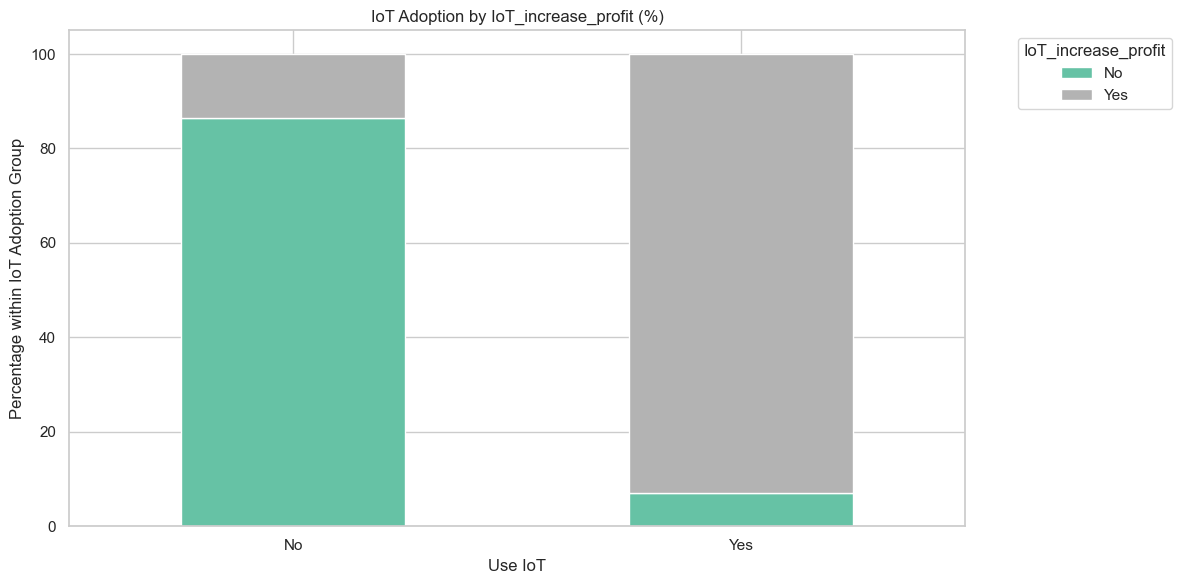


Chi-Square Test between 'Use_IoT' and 'IoT_customer_retention':
Chi2 = 119.42, df = 1, p-value = 0.0000
→ Significant association found (p < 0.05)


IoT Adoption by IoT_customer_retention  - Percentage (%):
 IoT_customer_retention     No    Yes
Use_IoT                             
No                      84.75  15.25
Yes                      7.74  92.26


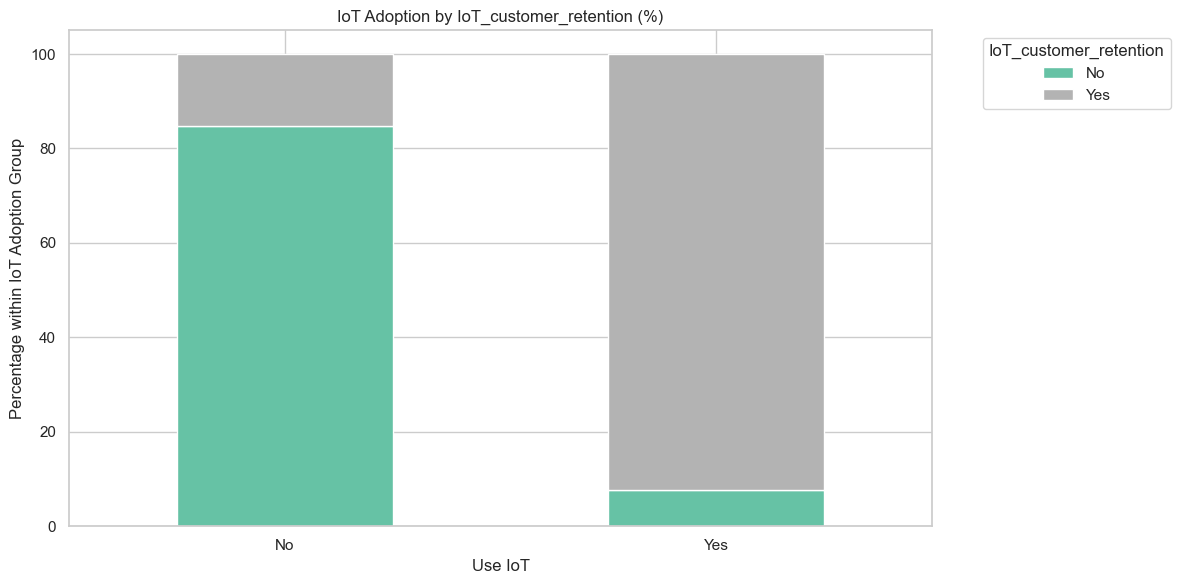


Chi-Square Test between 'Use_IoT' and 'IoT_reduce_loss':
Chi2 = 77.25, df = 1, p-value = 0.0000
→ Significant association found (p < 0.05)


IoT Adoption by IoT_reduce_loss  - Percentage (%):
 IoT_reduce_loss     No    Yes
Use_IoT                      
No               77.97  22.03
Yes              14.19  85.81


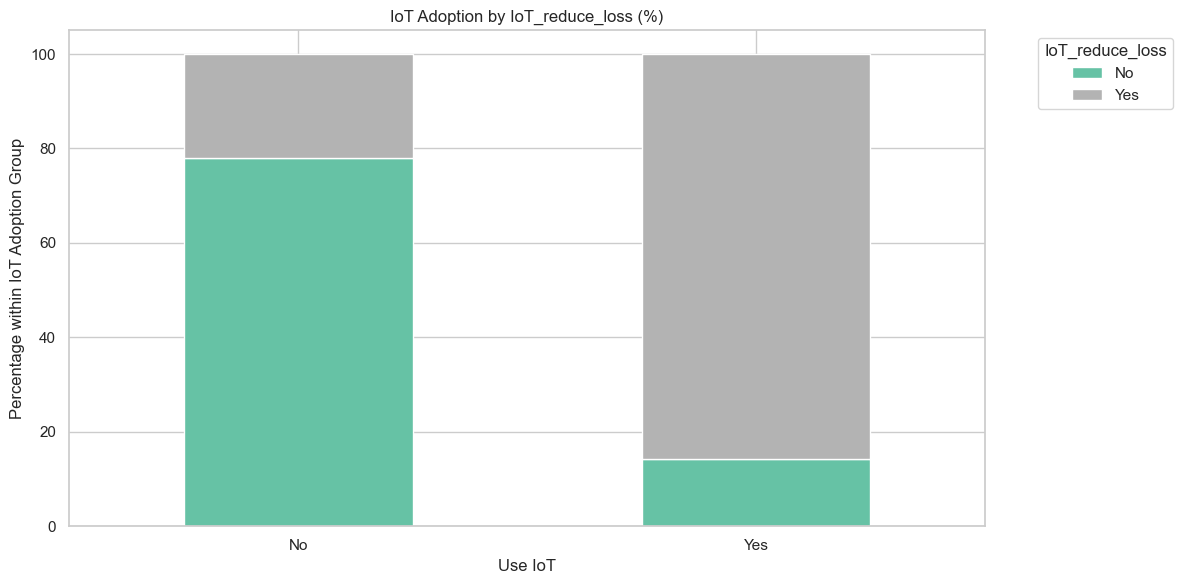

In [91]:
cols = ['IoT_increase_profit', 'IoT_customer_retention', 'IoT_reduce_loss']

for col in cols:
    # Raw count crosstab (not normalized)
    ct = pd.crosstab(df['Use_IoT'], df[col])

    # Perform chi-squared test
    chi2, p, dof, expected = chi2_contingency(ct)

    print(f"\nChi-Square Test between 'Use_IoT' and '{col}':")
    print(f"Chi2 = {chi2:.2f}, df = {dof}, p-value = {p:.4f}")

    if p < 0.05:
        print("→ Significant association found (p < 0.05)")
    else:
        print("→ No significant association (p ≥ 0.05)")

    # Normalized table for percentage plot
    ct_norm = ct.div(ct.sum(axis=1), axis=0) * 100
    print("\n\nIoT Adoption by", col, " - Percentage (%):\n", ct_norm.round(2))
    
    # Plot stacked bar chart
    ct_norm.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
    plt.title(f'IoT Adoption by {col} (%)')
    plt.ylabel('Percentage within IoT Adoption Group')
    plt.xlabel('Use IoT')
    plt.xticks(rotation=0)
    plt.legend(title=col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

## Objective 5: Profitability & Efficiency Outcomes

This objective examines whether the integration of IoT has had a measurable effect on the **profitability** and **operational efficiency** of SMEs in Osogbo, Osun State.

---

### Descriptive Summary of Outcomes Among All Respondents

- **Significant Profit Increase**:  
 Yes – 71.0%  
 No – 29.0%

- **Customer Retention**:  
 Yes – 71.0%  
 No – 29.0%

- **Loss Reduction**:  
 Yes – 68.2%  
 No – 31.8%

 *Insight*: A substantial majority of respondents reported **positive business outcomes** from using IoT, particularly in profitability, customer retention, and minimizing loss.

---

### Association Between IoT Usage and Business Outcomes

#### Profit Increase

- **Chi-Square Test**: χ² = 126.91, *p* < 0.001  
- **Significant association** between IoT usage and reported profit increase.

| Use of IoT | Profit Increase (%) | No Increase (%) |
|------------|---------------------|------------------|
| Yes        | 92.9%               | 7.1%             |
| No         | 13.6%               | 86.4%            |

---

#### Customer Retention

- **Chi-Square Test**: χ² = 119.42, *p* < 0.001  
- **Significant association** between IoT usage and better customer retention.

| Use of IoT | Retain Customers (%) | No Retention (%) |
|------------|----------------------|------------------|
| Yes        | 92.3%                | 7.7%             |
| No         | 15.3%                | 84.7%            |

---

#### Loss Reduction

- **Chi-Square Test**: χ² = 77.25, *p* < 0.001  
- **Significant association** between IoT usage and loss reduction.

| Use of IoT | Reduced Loss (%) | No Reduction (%) |
|------------|------------------|------------------|
| Yes        | 85.8%            | 14.2%            |
| No         | 22.0%            | 78.0%            |

---

### Key Insights

- SMEs that **integrated IoT** reported **much higher rates** of profit gains, better customer retention, and reduced losses.
- The associations were **strong and statistically significant**, reinforcing the **tangible business value** of IoT.

In [92]:
print("\n\n")

## Summary of Key Findings from the Analysis of each Objective

This study investigated the **awareness, adoption, and impact of IoT** among Small and Medium Enterprises (SMEs) in **Osogbo, Osun State**, through a structured, data-driven analysis. Below is a summary of the major insights drawn from the five key research objectives.

---

### Objective 1: IoT Awareness & Knowledge

- **78%** of respondents were aware of IoT, and knowledge levels were generally **high**, with most Likert-based questions averaging above **4.1/5**.
- **Education level** had a **significant influence** on IoT awareness. Respondents with B.Sc., M.Sc., or PhDs had the highest levels of awareness and understanding.
- Neither **age** nor **sex** showed significant impact on awareness.

---

### Objective 2: Extent of IoT Adoption & Application

- **72.4%** of businesses reported using IoT in some form.
- Most common applications include:
  - **In-built systems** for tracking goods (32.7%)
  - **Automated replies** to customers (28.0%)
  - **Recording customer info** (14.5%)
- IoT adoption is **significantly associated** with number of employees (higher in larger businesses) but not with years in business.
- A very strong relationship exists between **awareness and adoption** — nearly **89% of those aware** of IoT had adopted it.

---

### Objective 3: Education vs IoT Awareness & Adoption

- **Strong and statistically significant associations** were found between education level and both **awareness** and **adoption**.
- Respondents with higher education (especially M.Sc. and above) were **more likely to adopt** IoT, while those with only WAEC or Primary School qualifications had **lower adoption and awareness** rates.

---

### Objective 4: Impact on Business Growth & Development

- IoT usage was **strongly associated** with higher reported incomes.
  - **66.5%** of IoT users earned above ₦500,000 in the last 5 years, compared to only **23.7%** of non-users.
- Users were significantly more likely to report:
  - **Business growth** (92.3% vs. 8.5% among non-users)
  - **Customer retention**
  - **Reduction in loss**
- Among IoT users, **perceived growth** correlated with higher income categories.

---

### Objective 5: Profitability & Efficiency Outcomes

- High proportions of IoT users reported:
  - **Increased profit** (71%)
  - **Customer retention** (71%)
  - **Loss reduction** (68.2%)
- Chi-square tests revealed **very strong associations** between IoT usage and all three efficiency outcomes.
- For example, **92.9% of IoT users** reported profit increase compared to only **13.6% of non-users**.

---

### Overall Summary

The integration of IoT by SMEs in Osogbo is not only **widespread** but also **positively correlated with business success**. Education plays a major role in awareness and adoption, and businesses that use IoT consistently report better **profitability**, **efficiency**, and **growth**.

These findings support further **promotion of IoT technologies**, especially through education, capacity building, and policy support, to help more SMEs tap into its transformative potential.

In [94]:
print('\n\n\n\n\n')

# Final Conclusion: Comprehensive Summary of Findings

This research explored the **awareness, adoption, and impact of Internet of Things (IoT)** technologies among Small and Medium Enterprises (SMEs) in **Osogbo, Osun State**. The study followed a well-structured process consisting of **three main phases**: *Data Preparation*, *Descriptive Statistics*, and *Objective-Based Analysis* — each contributing to a robust understanding of the role of IoT in SME development.

---

## 1. Data Preparation

- Cleaned and standardized the dataset, ensuring consistency across all fields.
- Missing values were reviewed and appropriately handled.
- Questionnaire responses were renamed for clarity and ease of analysis.
- Final dataset consisted of **214 valid responses**, ready for statistical interpretation.

---

## 2. Descriptive Statistics

A clear demographic and operational profile of the SMEs in Osogbo emerged:

- **Balanced Gender Representation**: Equal male and female participation.
- **Age & Education**: Most respondents were aged 25 and above, and over 75% held at least a **B.Sc**, indicating a relatively educated SME population.
- **Business Size**: Despite over half being in operation for 6+ years, **77%** had fewer than 10 employees, confirming their small-scale nature.
- **IoT Awareness**: A strong **78%** had heard of IoT, with high knowledge scores (average >4.1/5 on Likert scales).
- **Perceived Benefits**: Over **85%** agreed that IoT improves **efficiency and speed**, and is applicable across business sectors.
- **Adoption**: A notable **72%** were already using IoT for inventory tracking, customer response automation, and data recording.
- **Barriers**: Key challenges included **lack of knowledge (66%)**, **insufficient funds (59%)**, **complexity**, and **maintenance needs**.
- **Financial Performance**: While many earned above ₦500,000 in the past five years, recent income reports show economic strain — possibly reflecting wider market trends.
- **Business Outcomes**: Among IoT adopters, more than **68–71%** experienced improved growth, profitability, retention, and reduced loss.

---

## 3. Objective-Based Findings

### Objective 1: IoT Awareness & Knowledge
- Awareness is **widespread** and **well-informed**, with strong agreement across knowledge indicators.
- **Education** was the only demographic factor with significant influence on awareness levels.

### Objective 2: Adoption & Application
- IoT adoption is **high (72.4%)**, particularly for tracking systems and automation.
- Adoption was **significantly associated with organization size** (employee count) but not business age.
- Nearly **89% of those aware** of IoT had adopted it — awareness strongly drives adoption.

### Objective 3: Education vs Awareness & Adoption
- Education level was **strongly correlated** with both awareness and adoption.
- Higher education (M.Sc. and PhD) led to significantly **greater engagement** with IoT.

### Objective 4: Impact on Growth & Development
- IoT usage was significantly associated with **higher income levels**, **business growth**, **retention**, and **loss reduction**.
- Among users, those who **perceived growth** were more likely to fall in **higher income brackets**.

### Objective 5: Profitability & Efficiency Outcomes
- IoT users reported:
  - **Profit increase** (71%)
  - **Customer retention** (71%)
  - **Loss reduction** (68.2%)
- Strong, statistically significant links were found between IoT usage and **all three efficiency outcomes**.

---

## Final Insight

The findings make it clear: **IoT is already reshaping SMEs in Osogbo**, improving efficiency, profitability, and customer outcomes. However, adoption gaps remain — primarily driven by **education**, **funding**, and **access to skilled support**.

To harness IoT’s full potential, the study supports:

- **Educational initiatives** to increase awareness and technical fluency.
- **Government or NGO interventions** to ease financial and infrastructural barriers.
- **Targeted policies** to promote digital transformation among SMEs.

> **In summary:** IoT adoption among SMEs in Osogbo is **both significant and impactful**, with clear evidence of **business gains** for those who have embraced the technology.